### Personal Activity Tracking Data Analysis by Ivaylo Pavlov

In [1]:
#Generic Imports and Display Settings
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.patches as mpatches, warnings
import seaborn as sns, scipy.stats as ss, matplotlib.mlab as mlab
warnings.filterwarnings('ignore')

%pylab inline
plt.rc("savefig", dpi=200)
matplotlib.style.use('ggplot')

pd.set_option('display.max_colwidth',80)

Populating the interactive namespace from numpy and matplotlib


#### Import and clean the daily data and transform the heart rate intraday data for use

In [2]:
#Import the CSV files with the daily and intraday data
raw_daily_data = pd.read_csv("Health Data-daily.csv")
raw_intraday = pd.read_csv('Health Data-intraday.csv')
raw_sleep_data = pd.read_csv('Sleep Analysis.csv')

#Extract only the heart rate from the intraday data and the delete the rest, add a day only column
raw_intraday_data = raw_intraday.copy()
raw_intraday_data.index = raw_intraday_data['Start']
raw_intraday_data = raw_intraday_data.ix[:,'Heart Rate (count/min)']
raw_intraday_data = pd.DataFrame(raw_intraday_data)
raw_intraday_data.index = pd.to_datetime(raw_intraday_data.index)
raw_intraday_data = raw_intraday_data.ix[raw_intraday_data.index>'11-Mar-2016 18:00']
raw_intraday_data = raw_intraday_data.replace(0, np.nan)
raw_intraday_data = raw_intraday_data.dropna(axis=0)
raw_intraday_data['Date'] = raw_intraday_data.index.date
hr_intraday = raw_intraday_data

#Extract only the steps from the intraday data and the delete the rest, add a day only column
raw_intraday_data2 = raw_intraday.copy()
raw_intraday_data2 = raw_intraday_data2.ix[:,('Start','Finish','Steps (count)')]
raw_intraday_data2 = pd.DataFrame(raw_intraday_data2)
raw_intraday_data2.index = pd.to_datetime(raw_intraday_data2['Start'])
#raw_intraday_data2 = raw_intraday_data2.ix[raw_intraday_data2.index>'11-Mar-2016 18:00']
raw_intraday_data2 = raw_intraday_data2.replace(0, np.nan)
raw_intraday_data2 = raw_intraday_data2.dropna(axis=0)
raw_intraday_data2['Date'] = raw_intraday_data2.index.date
raw_intraday_data2['Hour'] = raw_intraday_data2.index.time
raw_intraday_data2['Weekday'] = pd.DatetimeIndex(raw_intraday_data2['Date']).dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
raw_intraday_data2['Weekday'] = raw_intraday_data2['Weekday'].apply(lambda x: days[x])
steps_intraday = raw_intraday_data2

#Extract only the heart rate from the intraday data and the delete the rest, add a day only column
raw_intraday_data3 = raw_intraday.copy()
raw_intraday_data3 = raw_intraday_data3.ix[:,('Start','Finish','Heart Rate (count/min)')]
raw_intraday_data3 = pd.DataFrame(raw_intraday_data3)
raw_intraday_data3.index = pd.to_datetime(raw_intraday_data3['Start'])
raw_intraday_data3 = raw_intraday_data3.ix[raw_intraday_data3.index>'11-Mar-2016 18:00']
raw_intraday_data3 = raw_intraday_data3.replace(0, np.nan)
raw_intraday_data3 = raw_intraday_data3.dropna(axis=0)
raw_intraday_data3['Date'] = raw_intraday_data3.index.date
raw_intraday_data3['Hour'] = raw_intraday_data3.index.time
raw_intraday_data3['Weekday'] = pd.DatetimeIndex(raw_intraday_data3['Date']).dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
raw_intraday_data3['Weekday'] = raw_intraday_data3['Weekday'].apply(lambda x: days[x])
hr_intraday2 = raw_intraday_data3

#Clean up the sleep data and aggregate by day and add a weekday to the table
raw_sleep_data2 = raw_sleep_data.ix[:,["In bed Finish","Minutes in bed"]]
raw_sleep_data2.index = pd.to_datetime(raw_sleep_data2["In bed Finish"])
raw_sleep_data2.index = raw_sleep_data2.index.date
raw_sleep_data2 = raw_sleep_data2.drop("In bed Finish", axis=1)
raw_sleep_data2 = raw_sleep_data2.groupby(raw_sleep_data2.index).agg('sum')
raw_sleep_data2['Hours in bed'] = raw_sleep_data2['Minutes in bed']/60
raw_sleep_data2 = raw_sleep_data2.drop("Minutes in bed", axis=1)
raw_sleep_data2['Weekday'] = pd.DatetimeIndex(raw_sleep_data2.index).dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
raw_sleep_data2['Weekday'] = raw_sleep_data2['Weekday'].apply(lambda x: days[x])

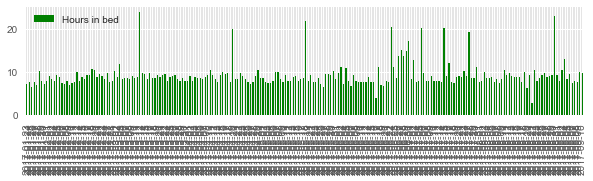

In [3]:
#Daily amount of sleep
raw_sleep_data2.plot.bar(color='g',figsize=(10,2))

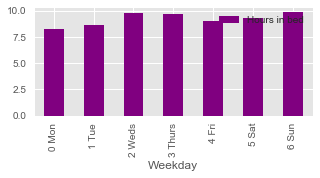

In [4]:
# Average sleep per weekday
raw_sleep_data2.groupby("Weekday").agg('mean').plot.bar(color='purple',figsize=(5,2))

#### Delete all the zero columns, set table index and delete the useless columns and add Total Calories and Weekday columns to DataSet

In [5]:
data = raw_daily_data.ix[:, (raw_daily_data != 0).any(axis=0)]
data = data.set_index(pd.DatetimeIndex(data['Start']))
data = data.drop(['Start','Finish'],axis=1)

data['Total Calories (kcal)'] = data['Active Calories (kcal)'] + data['Resting Calories (kcal)']
data['Weekday'] = data.index.dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
data['Weekday'] = data['Weekday'].apply(lambda x: days[x])

In [6]:
#Get table stats - rows and columns
print ("ROWS OF DATA / DAILY: " + str(raw_daily_data.shape[0]) + " / INTRADAY: " + str(hr_intraday.shape[0]))
print ("")
data.tail(7)

ROWS OF DATA / DAILY: 767 / INTRADAY: 8149



,Active Calories (kcal),Blood Glucose (mg/dL),Blood Pressure (Diastolic) (mmHg),Blood Pressure (Systolic) (mmHg),Body Fat Percentage (%),Body Mass Index (count),Distance (km),Flights Climbed (count),Heart Rate (count/min),Lean Body Mass (kg),Oxygen Saturation (%),Resting Calories (kcal),Steps (count),Weight (kg),Total Calories (kcal),Weekday
Start,,,,,,,,,,,,,,,,
2017-09-04,349.592000,0.0,0.0,0.0,0.00,0.0,5.597074,18.0,104.0,0.000,0.0,1580.811218,7257.000000,0.00,1930.403218,0 Mon
2017-09-05,353.263329,0.0,0.0,0.0,0.00,0.0,5.420324,18.0,116.0,0.000,0.0,1584.984832,7038.004403,0.00,1938.248161,1 Tue
2017-09-06,416.007722,0.0,0.0,0.0,0.00,0.0,7.115341,21.0,132.0,0.000,0.0,1592.209780,9240.202021,0.00,2008.217502,2 Weds
2017-09-07,657.412282,0.0,0.0,0.0,0.12,18.6,7.555005,19.0,162.0,51.348,0.0,1601.301638,9711.000000,58.35,2258.713919,3 Thurs
2017-09-08,332.833916,0.0,0.0,0.0,0.00,0.0,5.087559,10.0,107.0,0.000,0.0,1579.810541,6691.846079,0.00,1912.644457,4 Fri
2017-09-09,429.742219,0.0,0.0,0.0,0.00,0.0,7.816389,7.0,105.0,0.000,0.0,1605.664488,10102.153921,0.00,2035.406707,5 Sat
2017-09-10,309.694532,0.0,0.0,0.0,0.00,0.0,2.485014,0.0,140.0,0.000,0.0,837.291716,3186.000000,0.00,1146.986248,6 Sun


#### Clean up WEIGHT data, Fill previous values for the Weight-related data and remove starting NA rows (Weight, BMI, Body Fat %, Lean Body Mass)

In [7]:
data.ix[:,'Body Fat Percentage (%)'] *= 100 #Scale Body Fat Percentage (%) by 100
data.ix[:,'Weight (kg)'] = data.ix[:,'Weight (kg)'].replace(to_replace=0, method='ffill')
data.ix[:,'Body Fat Percentage (%)'] = data.ix[:,'Body Fat Percentage (%)'].replace(to_replace=0, method='ffill')
data.ix[:,'Body Mass Index (count)'] = data.ix[:,'Body Mass Index (count)'].replace(to_replace=0, method='ffill')
data.ix[:,'Lean Body Mass (kg)'] = data.ix[:,'Lean Body Mass (kg)'].replace(to_replace=0, method='ffill')
data_for_weight = data[np.isfinite(data['Weight (kg)'])]
data_for_weight = data_for_weight.ix[:,['Weight (kg)','Lean Body Mass (kg)','Body Fat Percentage (%)','Body Mass Index (count)']]
data_for_weight = data_for_weight.ix[data_for_weight.index>'2016-03-28']
print ("Rows remaining with Weight data: " + str(len(data_for_weight)))

Rows remaining with Weight data: 531


#### Clean up STEPS, FLIGHTS CLIMBED, DISTANCE data, Setting all days with less than 550 steps or less than 0.400 km as NaN (haven't worn the tracker or battery died)

In [8]:
print ("Rows before clean up: " + str(len(data)))
data_for_steps = data
data_for_steps.ix[data_for_steps.ix[:,'Steps (count)']<550,'Steps (count)'] = np.nan
data_for_steps.ix[data_for_steps.ix[:,'Distance (km)']<0.400,'Distance (km)'] = np.nan
data_for_steps = data_for_steps[np.isfinite(data_for_steps['Steps (count)'])]
data_for_steps = data_for_steps[np.isfinite(data_for_steps['Distance (km)'])]
print ("Rows lost after clean up: " + " " + str(len(data)-len(data_for_steps.index)))
print ("Rows after clean up: " + " " + str(len(data_for_steps.index)))
data_for_steps.tail()

Rows before clean up: 767
Rows lost after clean up:  103
Rows after clean up:  664


,Active Calories (kcal),Blood Glucose (mg/dL),Blood Pressure (Diastolic) (mmHg),Blood Pressure (Systolic) (mmHg),Body Fat Percentage (%),Body Mass Index (count),Distance (km),Flights Climbed (count),Heart Rate (count/min),Lean Body Mass (kg),Oxygen Saturation (%),Resting Calories (kcal),Steps (count),Weight (kg),Total Calories (kcal),Weekday
Start,,,,,,,,,,,,,,,,
2017-09-06,416.007722,0.0,0.0,0.0,12.7,18.8,7.115341,21.0,132.0,51.53319,0.0,1592.209780,9240.202021,59.03,2008.217502,2 Weds
2017-09-07,657.412282,0.0,0.0,0.0,12.0,18.6,7.555005,19.0,162.0,51.34800,0.0,1601.301638,9711.000000,58.35,2258.713919,3 Thurs
2017-09-08,332.833916,0.0,0.0,0.0,12.0,18.6,5.087559,10.0,107.0,51.34800,0.0,1579.810541,6691.846079,58.35,1912.644457,4 Fri
2017-09-09,429.742219,0.0,0.0,0.0,12.0,18.6,7.816389,7.0,105.0,51.34800,0.0,1605.664488,10102.153921,58.35,2035.406707,5 Sat
2017-09-10,309.694532,0.0,0.0,0.0,12.0,18.6,2.485014,0.0,140.0,51.34800,0.0,837.291716,3186.000000,58.35,1146.986248,6 Sun


#### Clean up CALORIES, WEEKDAY, HEART RATE (daily) data

In [9]:
data_for_cal = data
data_for_cal.ix[data_for_cal.ix[:,'Total Calories (kcal)']<0.1,['Total Calories (kcal)','Active Calories (kcal)','Resting Calories (kcal)']] = np.nan
data_for_cal = data[np.isfinite(data['Total Calories (kcal)'])]
data_for_cal = data_for_cal.ix[data_for_cal.index>'2016-03-11']
data_for_cal2 = data_for_cal.drop(['Body Fat Percentage (%)','Body Mass Index (count)','Lean Body Mass (kg)','Weight (kg)','Distance (km)','Flights Climbed (count)','Steps (count)','Weekday','Total Calories (kcal)','Heart Rate (count/min)'],axis=1)

data_for_weekday = data.drop(['Body Fat Percentage (%)','Body Mass Index (count)','Lean Body Mass (kg)','Weight (kg)'],axis=1)

data_for_hr = data[["Heart Rate (count/min)","Weekday"]].copy()
data_for_hr = data_for_hr.ix[data_for_hr["Heart Rate (count/min)"]>0]

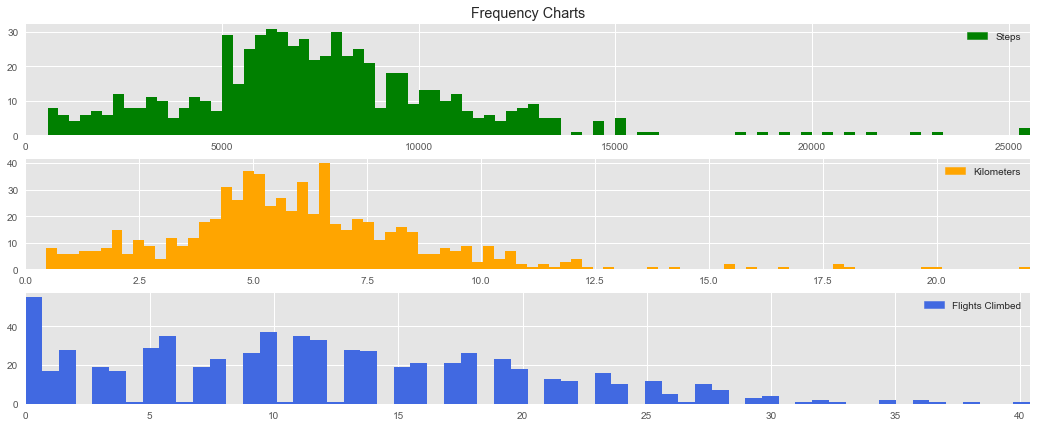

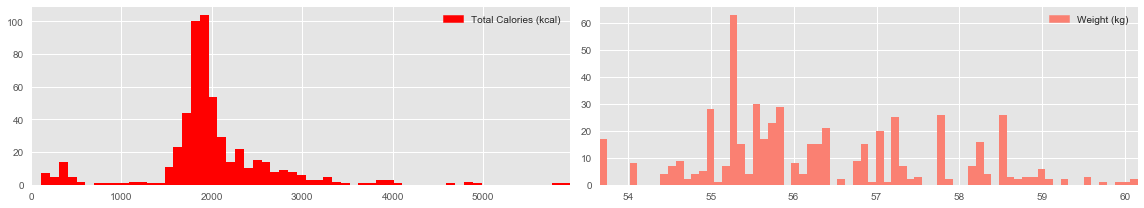

In [10]:
plt.figure(1,figsize=(18,7))

plt.subplot(311)
plt.title('Frequency Charts')
plt.legend(handles=[mpatches.Patch(color='green', label='Steps')])
plt.hist(data_for_steps.ix[:,'Steps (count)'], bins=90, color='g')
plt.xlim(0,data_for_steps.ix[:,'Steps (count)'].max())

plt.subplot(312)
plt.legend(handles=[mpatches.Patch(color='orange', label='Kilometers')])
plt.hist(data_for_steps.ix[:,'Distance (km)'], bins=90, color='orange')
plt.xlim(0,data_for_steps.ix[:,'Distance (km)'].max())

plt.subplot(313)
plt.legend(handles=[mpatches.Patch(color='royalblue', label='Flights Climbed')])
plt.hist(data_for_steps.ix[:,'Flights Climbed (count)'], bins=60, color='royalblue')
plt.xlim(0,data_for_steps.ix[:,'Flights Climbed (count)'].max())

plt.figure(2,figsize=(16,3))
plt.subplot(121)
plt.legend(handles=[mpatches.Patch(color='red', label='Total Calories (kcal)')])
plt.hist(data_for_cal.ix[:,'Total Calories (kcal)'], bins=60, color='red')
plt.xlim(0,data_for_cal.ix[:,'Total Calories (kcal)'].max())

plt.subplot(122)
plt.legend(handles=[mpatches.Patch(color='salmon', label='Weight (kg)')])
plt.hist(data_for_weight.ix[:,'Weight (kg)'], bins=70, color='salmon')
plt.xlim(data_for_weight.ix[:,'Weight (kg)'].min(),data_for_weight.ix[:,'Weight (kg)'].max())

plt.tight_layout()
plt.show()

,count,mean,std,min,25%,50%,75%,max
Steps (count),664.0,7458.360687,3533.766019,562.0,5510.0,7165.0,9231.050505,25540.233598


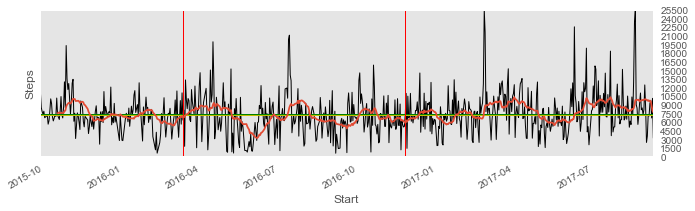

In [11]:
medianval = np.round(data_for_steps.ix[:,'Steps (count)'].median(),1)
avgval = np.round(data_for_steps.ix[:,'Steps (count)'].mean(),1)
maxval = np.round(data_for_steps.ix[:,'Steps (count)'].max(),1)

minor_ticks = np.arange(0, maxval+1, 1500, dtype=int)
minor_labels = minor_ticks

ax1 = data_for_steps.ix[:,'Steps (count)'].plot(color='000000',figsize=(11, 3),linewidth=1.0)

ax1.set_ylim(0,maxval)
ax1.set_ylabel('Steps')
ax1.set_yticks(minor_ticks)
ax1.set_yticklabels(minor_labels)
ax1.yaxis.tick_right()

ax1.set_xticks(data_for_steps.index, minor=True)
#Add the horizontal and vertical lines
ax1.axhline(y=medianval, linewidth=1, color='y')
ax1.axhline(y=avgval, linewidth=1, color='g')
ax1.axvline(x='2016-03-11', linewidth=1, color='r')
ax1.axvline(x='2016-11-25', linewidth=1, color='r')
ax1.grid(b=False)

#Rolling 20 Day MA
ma = data_for_steps.ix[:,'Steps (count)'].rolling(20).mean()
ax1.plot(ma)

pd.DataFrame(data_for_steps["Steps (count)"].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Flights Climbed (count),664.0,11.946164,8.222177,0.0,5.448819,11.0,18.0,40.4134


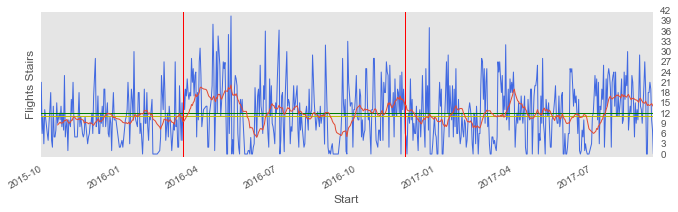

In [12]:
medianval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].median(),1)
avgval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].mean(),1)
maxval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].max(),1)

minor_ticks_stairs = np.arange(0, maxval2+2, 3, dtype=int)
minor_labels_stairs = minor_ticks_stairs

ax2 = data_for_steps.ix[:,'Flights Climbed (count)'].plot(color='royalblue',figsize=(11, 3),linewidth=1.0)

ax2.set_ylim(-1,maxval2)
ax2.set_ylabel('Flights Stairs')
ax2.set_yticks(minor_ticks_stairs)
ax2.set_yticklabels(minor_labels_stairs)
ax2.yaxis.tick_right()

#Add the horizontal and vertical lines
ax2.axhline(y=medianval2, linewidth=1, color='y')
ax2.axhline(y=avgval2, linewidth=1, color='g')
ax2.axvline(x='2016-03-11', linewidth=1, color='r')
ax2.axvline(x='2016-11-25', linewidth=1, color='r')
ax2.grid(b=False)

#Rolling 20 Day MA
ma2 = data_for_steps.ix[:,'Flights Climbed (count)'].rolling(20).mean()
ax2.plot(ma2,linewidth=1.0)

pd.DataFrame(data_for_steps['Flights Climbed (count)'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Distance (km),664.0,5.943803,2.861489,0.45,4.360709,5.634852,7.345759,22.046162


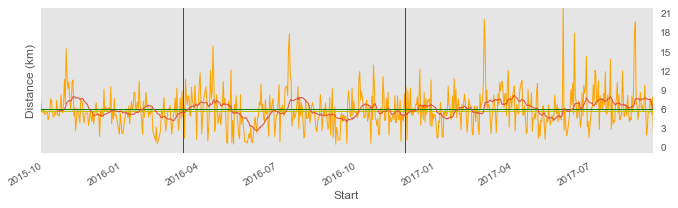

In [13]:
medianval3 = np.round(data_for_steps.ix[:,'Distance (km)'].median(),1)
avgval3 = np.round(data_for_steps.ix[:,'Distance (km)'].mean(),1)
maxval3 = np.round(data_for_steps.ix[:,'Distance (km)'].max(),1)

minor_ticks_km = np.arange(0, maxval3+1, 3, dtype=int)
minor_labels_km = minor_ticks_km

ax6 = data_for_steps.ix[:,'Distance (km)'].plot(color='orange',figsize=(11, 3),linewidth=1.0)

ax6.set_ylim(-1,data_for_steps.ix[:,'Distance (km)'].max())
ax6.set_ylabel('Distance (km)')
ax6.set_yticks(minor_ticks_km)
ax6.set_yticklabels(minor_labels_km)
ax6.yaxis.tick_right()

#Add the horizontal and vertical lines
ax6.axhline(y=medianval3, linewidth=1, color='y')
ax6.axhline(y=avgval3, linewidth=1, color='g')
ax6.axvline(x='2016-03-11', linewidth=1, color='r')
ax6.axvline(x='2016-11-25', linewidth=1, color='r')
ax6.grid(b=False)

#Rolling 20 Day MA
ma2 = data_for_steps.ix[:,'Distance (km)'].rolling(20).mean()
ax6.plot(ma2,linewidth=1.0)

pd.DataFrame(data_for_steps['Distance (km)'].describe()).transpose()

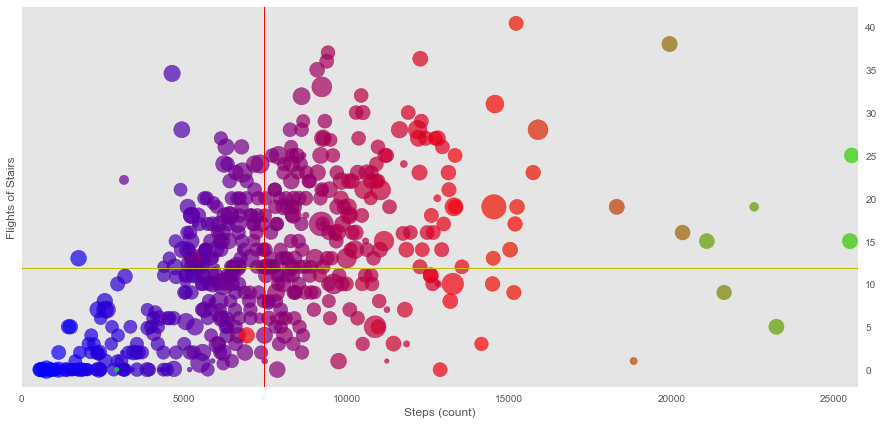

In [14]:
#Scatter chart Steps vs Stairs
plt.figure(1,figsize=(15,7))

x = data_for_steps.ix[:,'Steps (count)']
y = data_for_steps.ix[:,'Flights Climbed (count)']
plt.xlabel('Steps (count)')
plt.ylabel('Flights of Stairs')
plt.xlim(-5,data_for_steps.ix[:,'Steps (count)'].max()+200)
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.ylim(-2,data_for_steps.ix[:,'Flights Climbed (count)'].max()+2)
plt.grid(b=False)
plt.axhline(y=avgval2, linewidth=1, color='y')
plt.axvline(x=avgval, linewidth=1, color='r')

plt.scatter(x, y, alpha=0.7,c=data_for_steps.ix[:,'Distance (km)'], s=data_for_steps.ix[:,'Total Calories (kcal)']/10, cmap=cm.brg)
plt.show()

##### Most active day ever by number of climbed stairs

In [15]:
data_for_steps.ix[data_for_steps['Flights Climbed (count)']==data_for_steps['Flights Climbed (count)'].max()]

,Active Calories (kcal),Blood Glucose (mg/dL),Blood Pressure (Diastolic) (mmHg),Blood Pressure (Systolic) (mmHg),Body Fat Percentage (%),Body Mass Index (count),Distance (km),Flights Climbed (count),Heart Rate (count/min),Lean Body Mass (kg),Oxygen Saturation (%),Resting Calories (kcal),Steps (count),Weight (kg),Total Calories (kcal),Weekday
Start,,,,,,,,,,,,,,,,
2016-05-06,513.0,0.0,0.0,0.0,12.3,18.0,12.07,40.4134,115.0,48.91029,0.0,1526.0,15216.0,55.77,2039.0,4 Fri


##### Most active day ever by number of steps

In [16]:
data_for_steps.ix[data_for_steps['Steps (count)']==data_for_steps['Steps (count)'].max()]

,Active Calories (kcal),Blood Glucose (mg/dL),Blood Pressure (Diastolic) (mmHg),Blood Pressure (Systolic) (mmHg),Body Fat Percentage (%),Body Mass Index (count),Distance (km),Flights Climbed (count),Heart Rate (count/min),Lean Body Mass (kg),Oxygen Saturation (%),Resting Calories (kcal),Steps (count),Weight (kg),Total Calories (kcal),Weekday
Start,,,,,,,,,,,,,,,,
2017-02-25,683.524,0.0,0.0,0.0,11.9,18.0,20.060258,25.0,102.0,49.080509,0.0,1548.050351,25540.233598,55.709999,2231.574351,5 Sat


##### Most active day ever by distance done

In [17]:
data_for_steps.ix[data_for_steps['Distance (km)']==data_for_steps['Distance (km)'].max()]

,Active Calories (kcal),Blood Glucose (mg/dL),Blood Pressure (Diastolic) (mmHg),Blood Pressure (Systolic) (mmHg),Body Fat Percentage (%),Body Mass Index (count),Distance (km),Flights Climbed (count),Heart Rate (count/min),Lean Body Mass (kg),Oxygen Saturation (%),Resting Calories (kcal),Steps (count),Weight (kg),Total Calories (kcal),Weekday
Start,,,,,,,,,,,,,,,,
2017-05-28,199.462149,0.0,0.0,0.0,13.3,19.0,22.046162,0.0,107.0,51.63852,0.0,0.0,2940.0,59.56,199.462149,6 Sun


#### Weight, Lean Body Mass and Body Fat % Analysis

,Weight (kg),Lean Body Mass (kg),Body Fat Percentage (%),Body Mass Index (count)
Start,,,,
2017-09-10,58.35,51.348,12.0,18.6


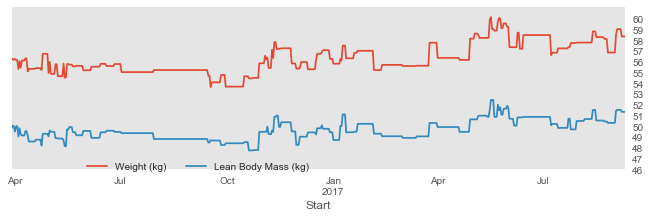

In [18]:
minor_ticks_weight = np.arange(data_for_weight['Lean Body Mass (kg)'].min()-1, data_for_weight['Weight (kg)'].max()+1, 1, dtype=int)
minor_labels_weight = minor_ticks_weight

ax9 = data_for_weight['Weight (kg)'].plot(secondary_y=True,figsize=(11, 3));
ax9 = data_for_weight['Lean Body Mass (kg)'].plot(secondary_y=True,figsize=(11, 3));
ax9.legend(loc=1, bbox_to_anchor=(0.5, 0.1), ncol=2)
ax9.grid(b=False)
ax9.yaxis.tick_right()
ax9.set_ylim(data_for_weight['Lean Body Mass (kg)'].min()-1,data_for_weight['Weight (kg)'].max()+1)
ax9.set_yticks(minor_ticks_weight)
ax9.set_yticklabels(minor_labels_weight)

data_for_weight.tail(1)

In [19]:
#Averages, Medians, High, Low per Weekday
data_for_weekday.groupby('Weekday').agg(['mean','median','min','max','std']).transpose()

Weekday                                          0 Mon         1 Tue  \
Active Calories (kcal)            mean      568.621934    511.073526   
                                  median    395.739927    364.571000   
                                  min        40.000000      0.000000   
                                  max      4100.000000   3946.000000   
                                  std       593.840029    504.718981   
Blood Glucose (mg/dL)             mean        0.793347      0.000000   
                                  median      0.000000      0.000000   
                                  min         0.000000      0.000000   
                                  max        86.474822      0.000000   
                                  std         8.282786      0.000000   
Blood Pressure (Diastolic) (mmHg) mean        0.568807      0.000000   
                                  median      0.000000      0.000000   
                                  min         0.000000      0.000000   
                                  max        62.000000      0.000000   
                                  std         5.938523      0.000000   
Blood Pressure (Systolic) (mmHg)  mean        0.880734      0.000000   
                                  median      0.000000      0.000000   
                                  min         0.000000      0.000000   
                                  max        96.000000      0.000000   
                                  std         9.195132      0.000000   
Distance (km)                     mean        5.790673      5.873293   
                                  median      5.802497      5.632659   
                                  min         0.450000      0.740000   
                                  max        12.248473     15.466486   
                                  std         2.305463      2.369301   
Flights Climbed (count)           mean       12.250969     11.879532   
                                  median     12.000000     12.000000   
                                  min         0.000000      0.000000   
                                  max        33.000000     35.000000   
                                  std         8.252108      7.577167   
Heart Rate (count/min)            mean       88.376147     83.192661   
                                  median    113.000000    107.000000   
                                  min         0.000000      0.000000   
                                  max       175.000000    167.000000   
                                  std        58.367893     58.280846   
Oxygen Saturation (%)             mean        0.000000      0.000000   
                                  median      0.000000      0.000000   
                                  min         0.000000      0.000000   
                                  max         0.000000      0.000000   
                                  std         0.000000      0.000000   
Resting Calories (kcal)           mean     1505.486257   1527.659352   
                                  median   1534.943595   1535.229885   
                                  min         0.000000      0.000000   
                                  max      1860.000000   1860.000000   
                                  std       421.566375    384.738955   
Steps (count)                     mean     7330.887368   7460.758010   
                                  median   7275.000000   7132.000000   
                                  min       562.000000    910.000000   
                                  max     14533.000000  20337.000000   
                                  std      2862.562375   3006.891487   
Total Calories (kcal)             mean     2074.108191   2038.732877   
                                  median   1927.201609   1910.000000   
                                  min       200.250485    304.001291   
                                  max      5960.000000   5806.000000   
                                  std   

#### Heart Rate Data Analysis

[]

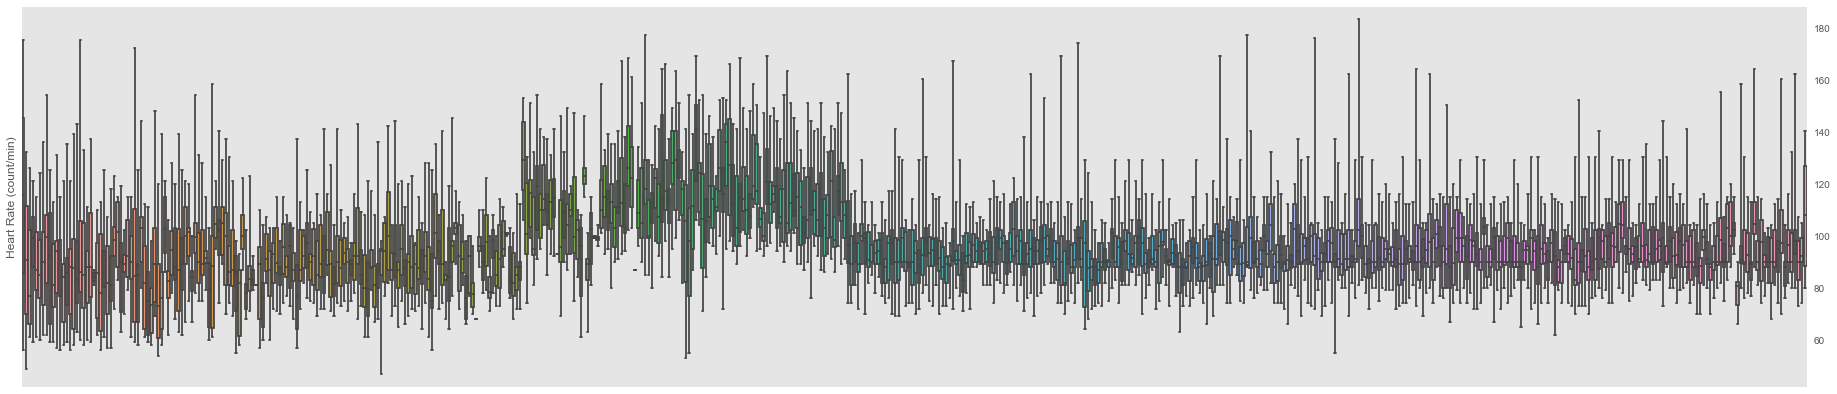

In [20]:
#Box Plot for Heart Rate Data 
plt.figure(figsize=(32,7))
ax5 = sns.boxplot(x="Date", y="Heart Rate (count/min)", data=hr_intraday, whis=[0,100])
ax5.set_ylim(hr_intraday['Heart Rate (count/min)'].min()-5,hr_intraday['Heart Rate (count/min)'].max()+5)
ax5.set_xticklabels(hr_intraday['Date'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
ax5.axes.get_xaxis().set_visible(False)
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)
ax5.plot()

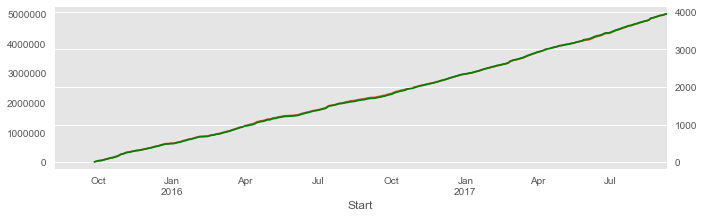

In [21]:
#Cumulative Charts
#Cumulative steps done
#Cumulative km walked
#Cumulative dataset

cumulative = data[['Steps (count)','Distance (km)','Flights Climbed (count)']].copy()
cumulative = cumulative.cumsum(axis=0, skipna=True)
cumulative = cumulative.fillna(method='ffill')
cumulative['Steps (count)'].plot(figsize=(11,3))
cumulative['Distance (km)'].plot(secondary_y=True, style='g')

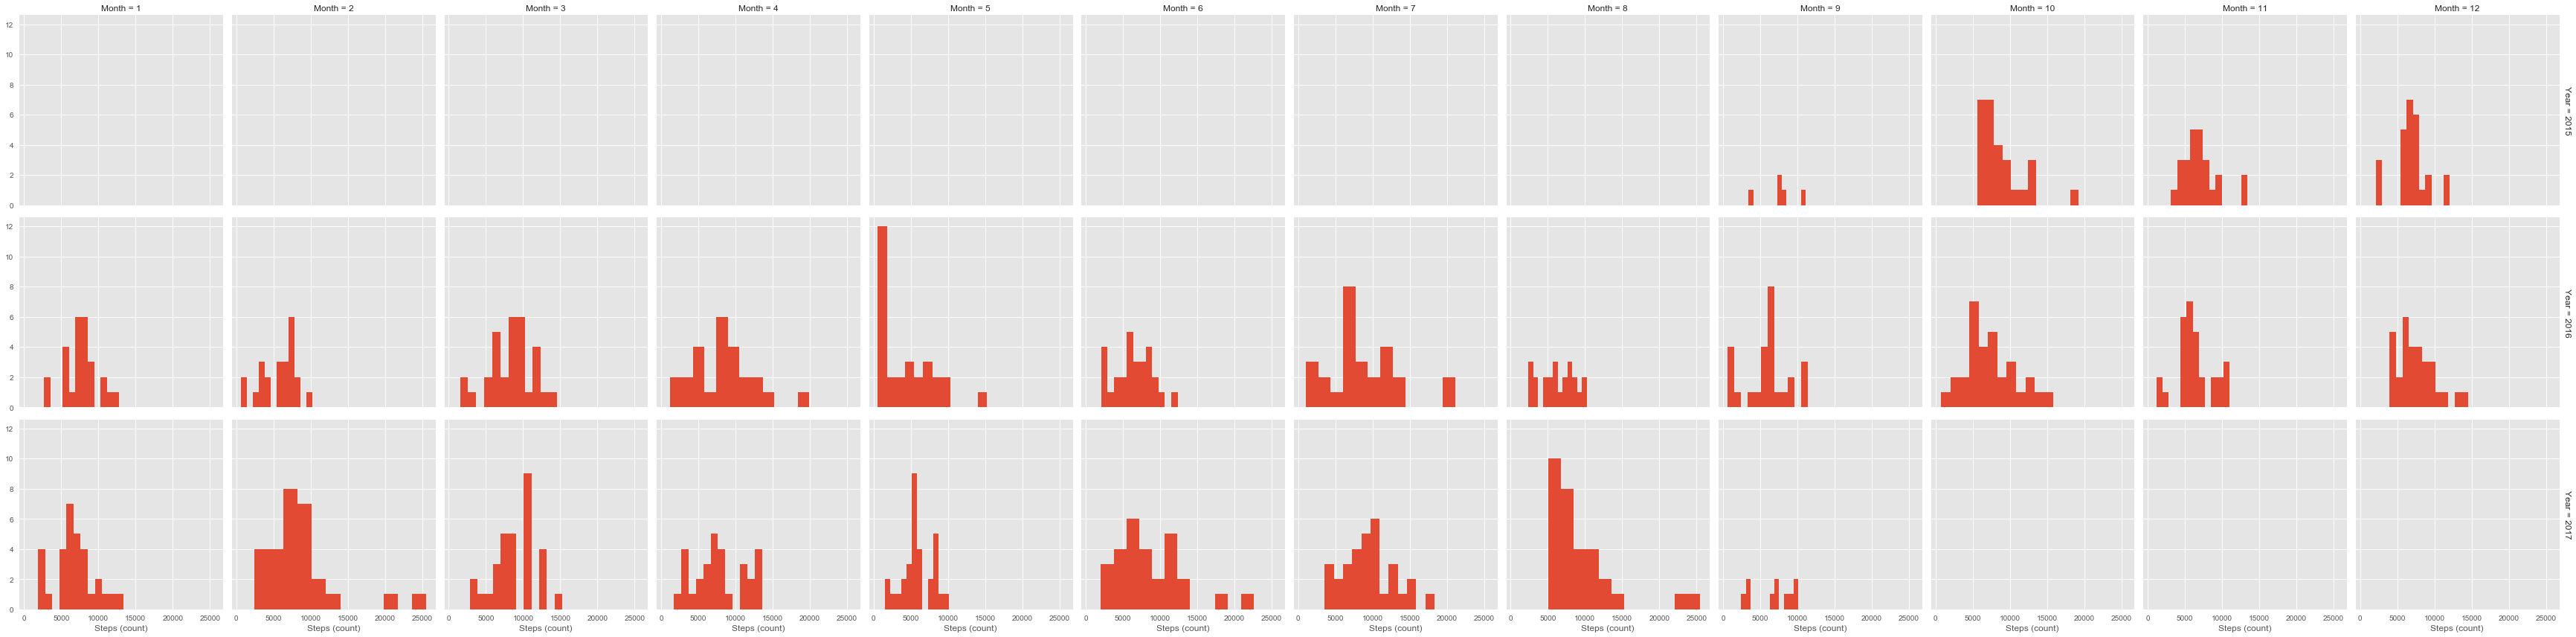

In [22]:
#matrix charts histograms steps done per month
matrixdata = data_for_steps[['Steps (count)','Distance (km)','Flights Climbed (count)','Weekday']].copy()
matrixdata['Month']=pd.to_datetime(matrixdata.index).month
matrixdata['Year']=pd.to_datetime(matrixdata.index).year
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=12)

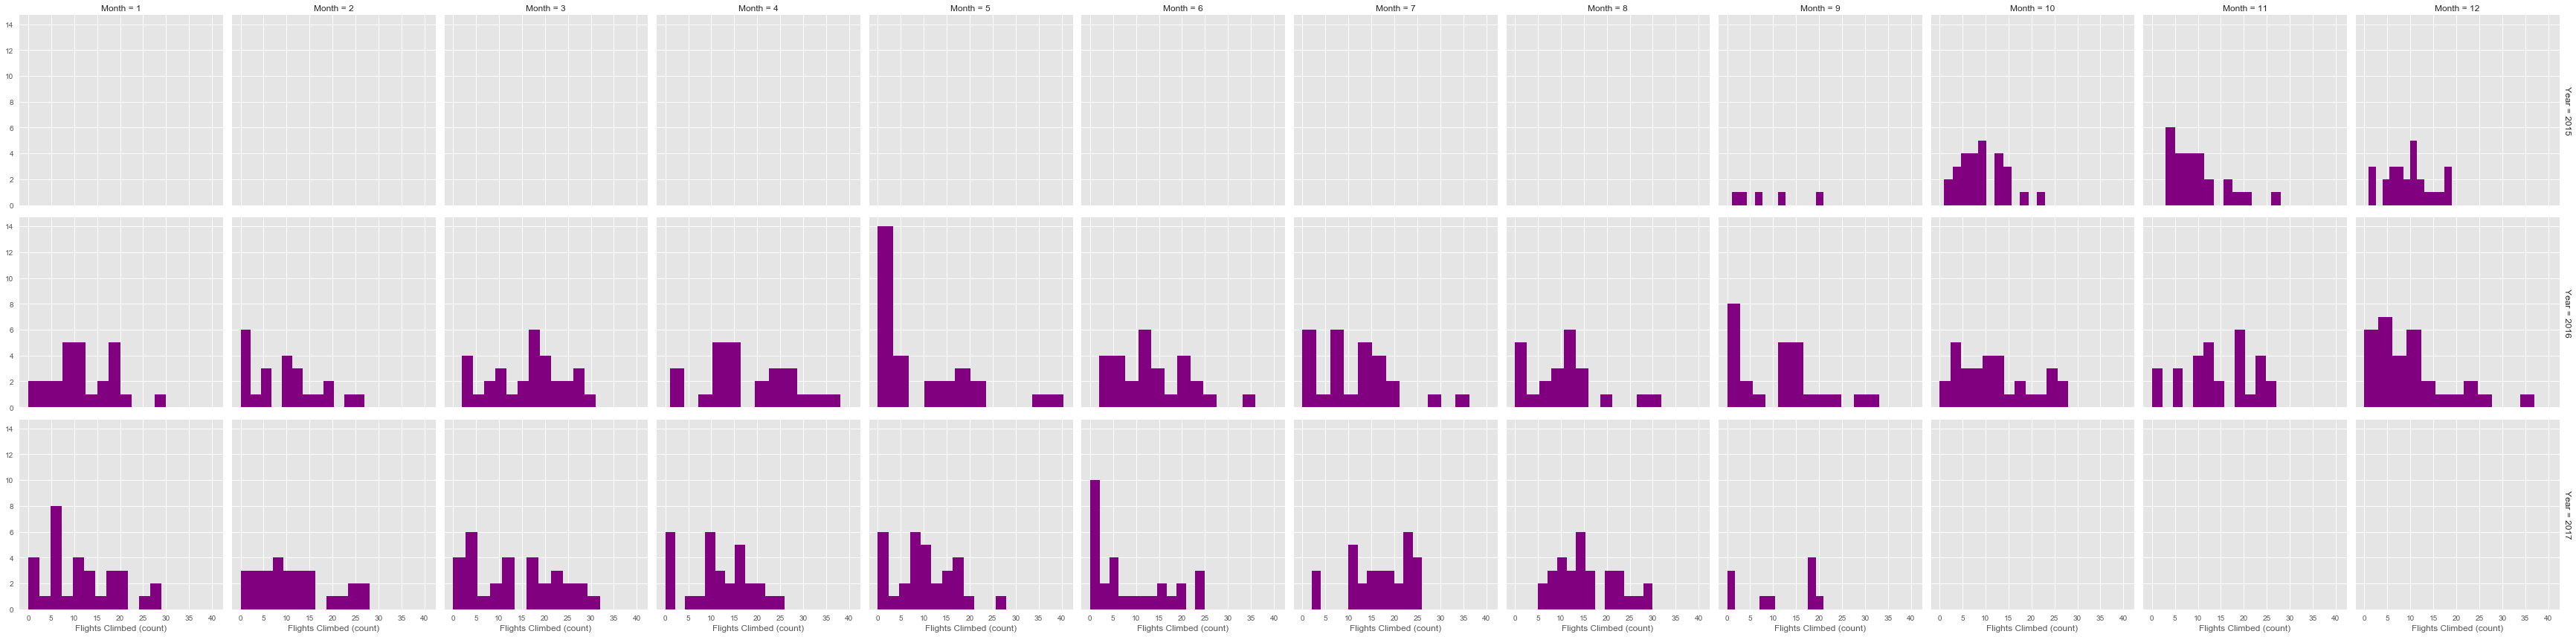

In [23]:
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(plt.hist, "Flights Climbed (count)", bins=12, color="purple")

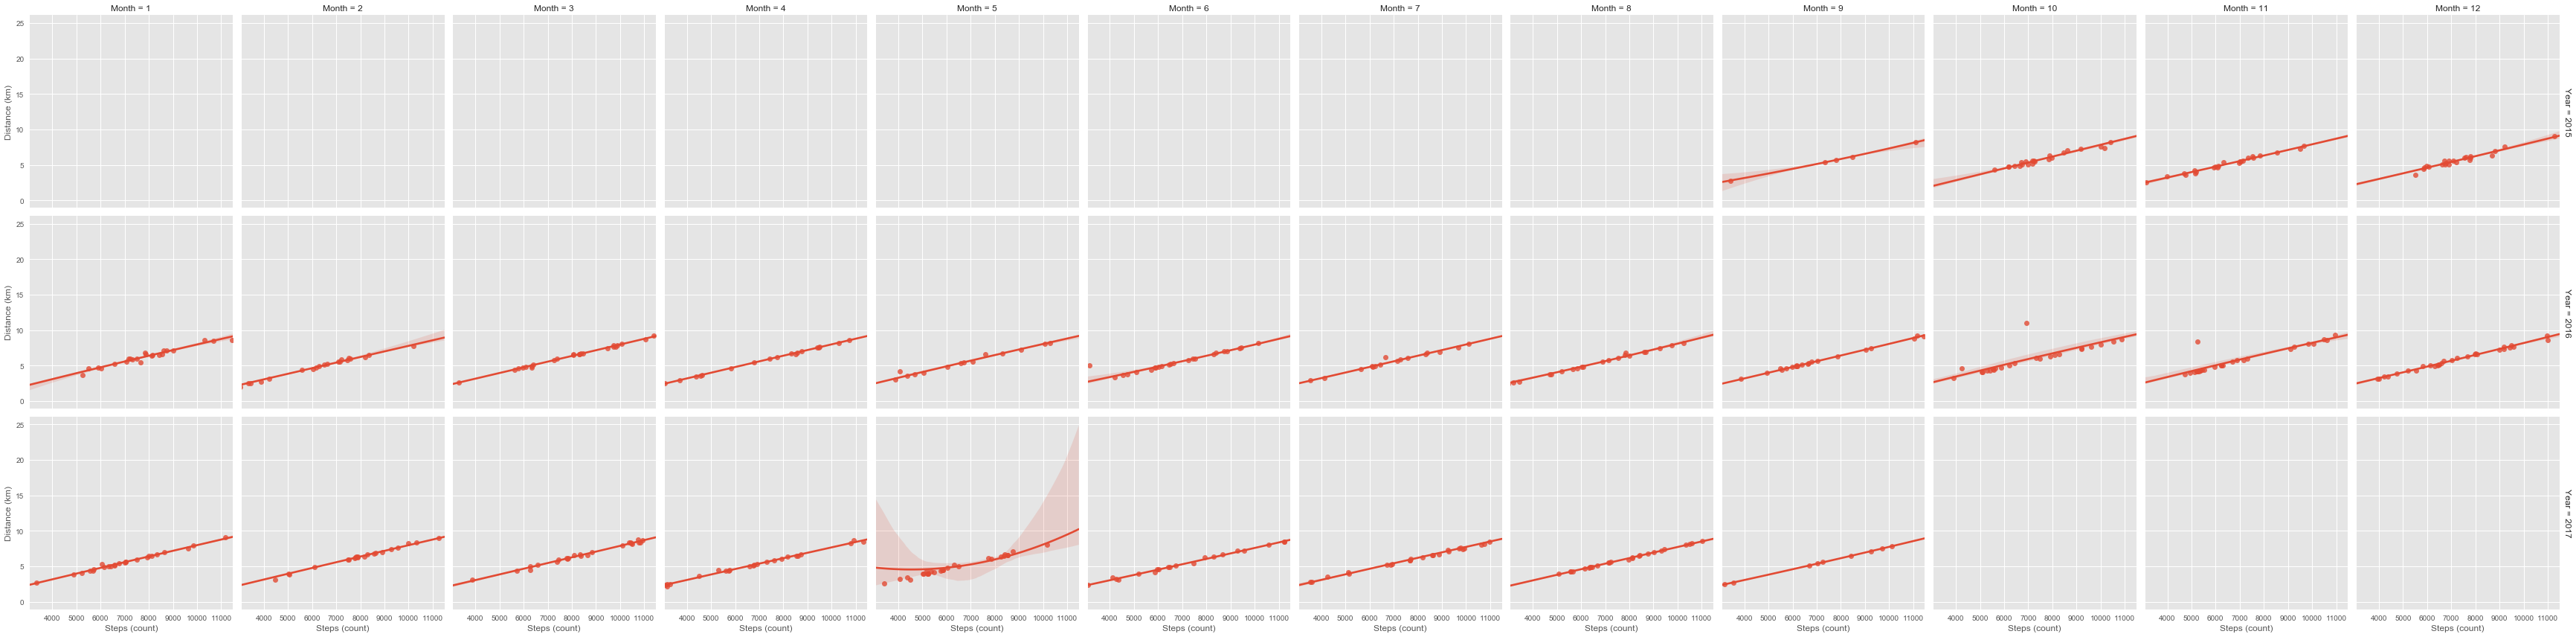

In [24]:
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(sns.regplot, "Steps (count)", "Distance (km)", order=2)

In [25]:
matrixdata

,Steps (count),Distance (km),Flights Climbed (count),Weekday,Month,Year
Start,,,,,,
2015-09-26,3430.000000,2.812128,1.0,5 Sat,9,2015
2015-09-27,11099.000000,8.199522,4.0,6 Sun,9,2015
2015-09-28,8494.000000,6.162432,21.0,0 Mon,9,2015
2015-09-29,7810.000000,5.719998,6.0,1 Tue,9,2015
2015-09-30,7339.000000,5.386713,11.0,2 Weds,9,2015
2015-10-01,7865.000000,5.838327,3.0,3 Thurs,10,2015
2015-10-02,6728.000000,5.077170,13.0,4 Fri,10,2015
2015-10-05,7172.000000,5.544170,6.0,0 Mon,10,2015
2015-10-06,5612.000000,4.284495,4.0,1 Tue,10,2015


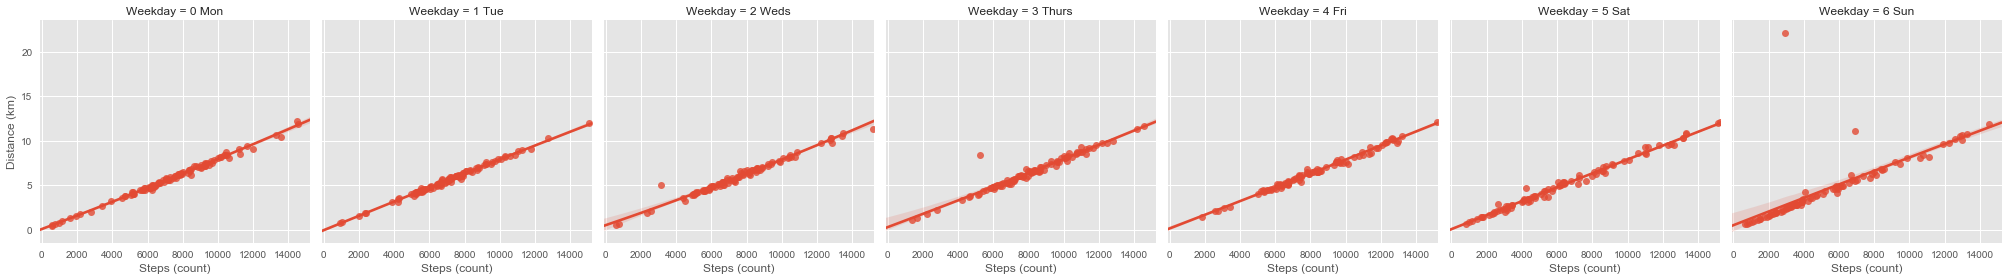

In [26]:
matrixdata = matrixdata.sort_values("Weekday")
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(sns.regplot, "Steps (count)", "Distance (km)", order=2)

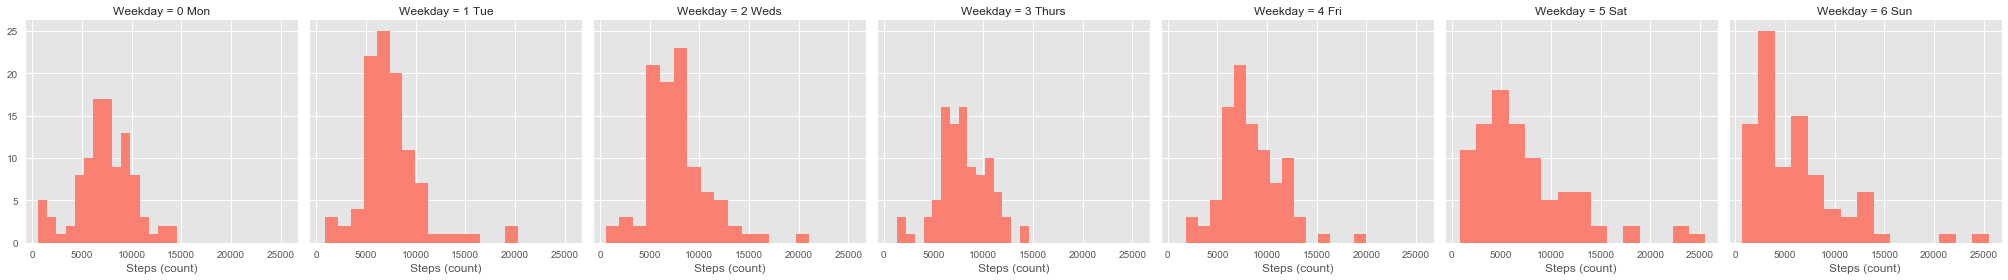

In [27]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=15, color="salmon")

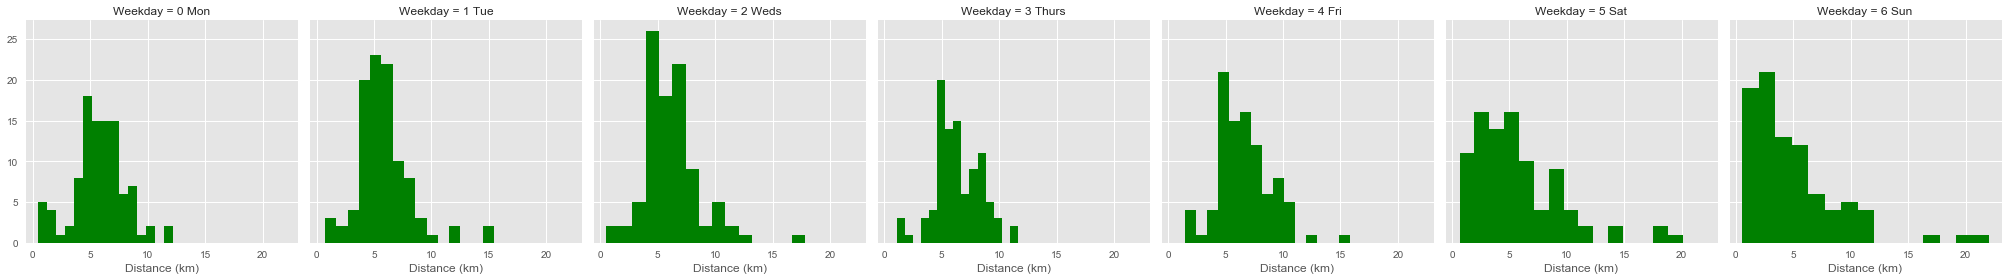

In [28]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Distance (km)", bins=15, color="g")

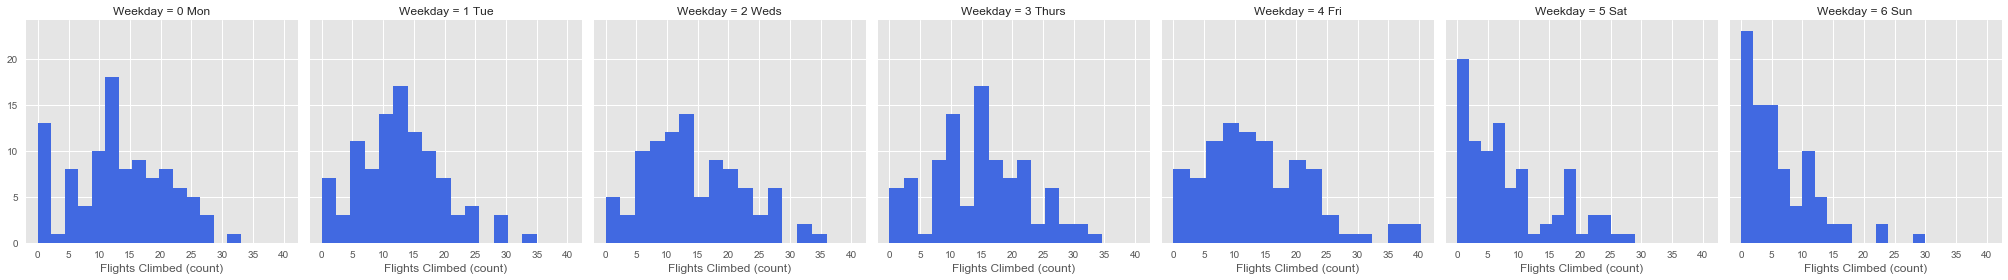

In [29]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Flights Climbed (count)", bins=15, color="royalblue")

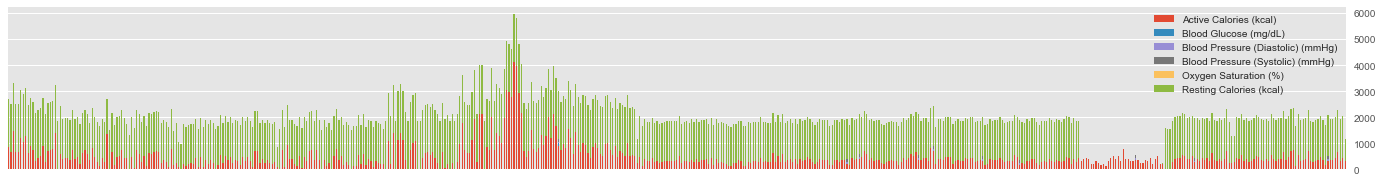

In [30]:
ax7 = data_for_cal2.plot.bar(stacked=True, figsize=(24, 3))
ax7.axes.get_xaxis().set_visible(False)
ax7.yaxis.tick_right()

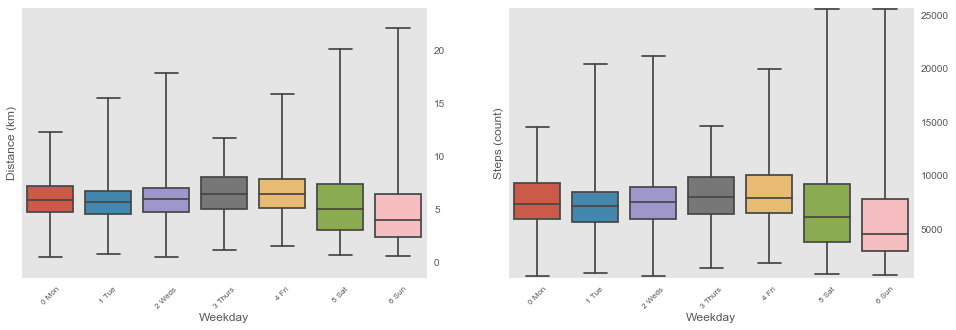

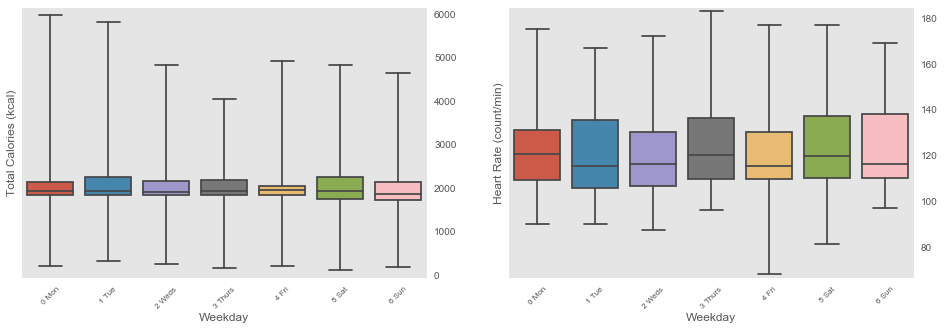

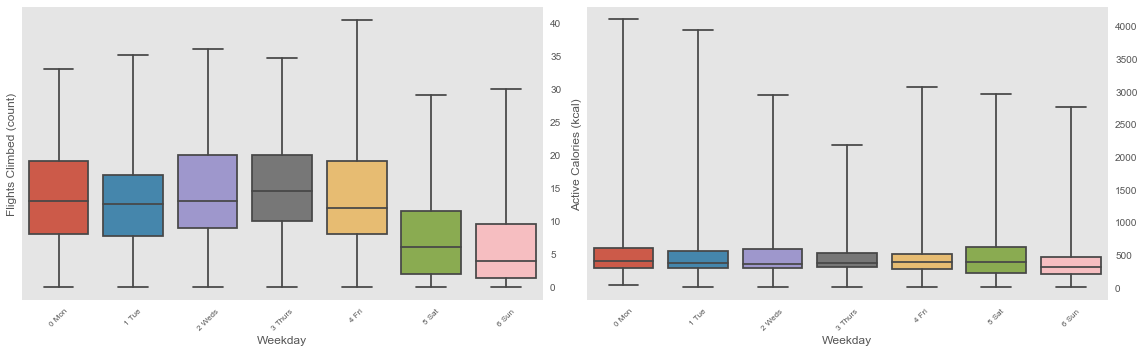

In [31]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
data_for_steps = data_for_steps.sort_values("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Distance (km)", data=data_for_steps, whis=[0,100],)
ax5.set_ylim(data_for_steps["Distance (km)"].min()-2,data_for_steps["Distance (km)"].max()+2)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
ax5 = sns.boxplot(x="Weekday", y="Steps (count)", data=data_for_steps, whis=[0,100],)
ax5.set_ylim(data_for_steps["Steps (count)"].min()-200,data_for_steps["Steps (count)"].max()+200)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.figure(2,figsize=(16,5))
plt.subplot(121)
data_for_cal = data_for_cal.sort_values("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Total Calories (kcal)", data=data_for_cal, whis=[0,100],)
ax5.set_ylim(data_for_cal['Total Calories (kcal)'].min()-200,data_for_cal['Total Calories (kcal)'].max()+200)
ax5.set_xticklabels(data_for_cal['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
data_for_hr = data_for_hr.sort_values("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Heart Rate (count/min)", data=data_for_hr, whis=[0,100],)
ax5.set_ylim(data_for_hr['Heart Rate (count/min)'].min()-2,data_for_hr['Heart Rate (count/min)'].max()+2)
ax5.set_xticklabels(data_for_hr['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.figure(3,figsize=(16,5))
plt.subplot(121)
ax5 = sns.boxplot(x="Weekday", y="Flights Climbed (count)", data=data_for_steps, whis=[0,100])
ax5.set_ylim(data_for_steps['Flights Climbed (count)'].min()-2,data_for_steps['Flights Climbed (count)'].max()+2)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
ax5 = sns.boxplot(x="Weekday", y="Active Calories (kcal)", data=data_for_cal, whis=[0,100],)
ax5.set_ylim(data_for_cal['Active Calories (kcal)'].min()-200,data_for_cal['Active Calories (kcal)'].max()+200)
ax5.set_xticklabels(data_for_cal['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

In [32]:
#hourly steps by weekday & hourly steps by weekend
steps_intraday = steps_intraday.sort_values("Hour")
steps_intraday.head()

,Start,Finish,Steps (count),Date,Hour,Weekday
Start,,,,,,
2017-08-23,23-Aug-2017 00:00,23-Aug-2017 01:00,48.000000,2017-08-23,00:00:00,2 Weds
2017-08-13,13-Aug-2017 00:00,13-Aug-2017 01:00,68.000000,2017-08-13,00:00:00,6 Sun
2016-12-13,13-Dec-2016 00:00,13-Dec-2016 01:00,197.774790,2016-12-13,00:00:00,1 Tue
2017-05-14,14-May-2017 00:00,14-May-2017 01:00,358.000000,2017-05-14,00:00:00,6 Sun
2017-03-28,28-Mar-2017 00:00,28-Mar-2017 01:00,140.647467,2017-03-28,00:00:00,1 Tue


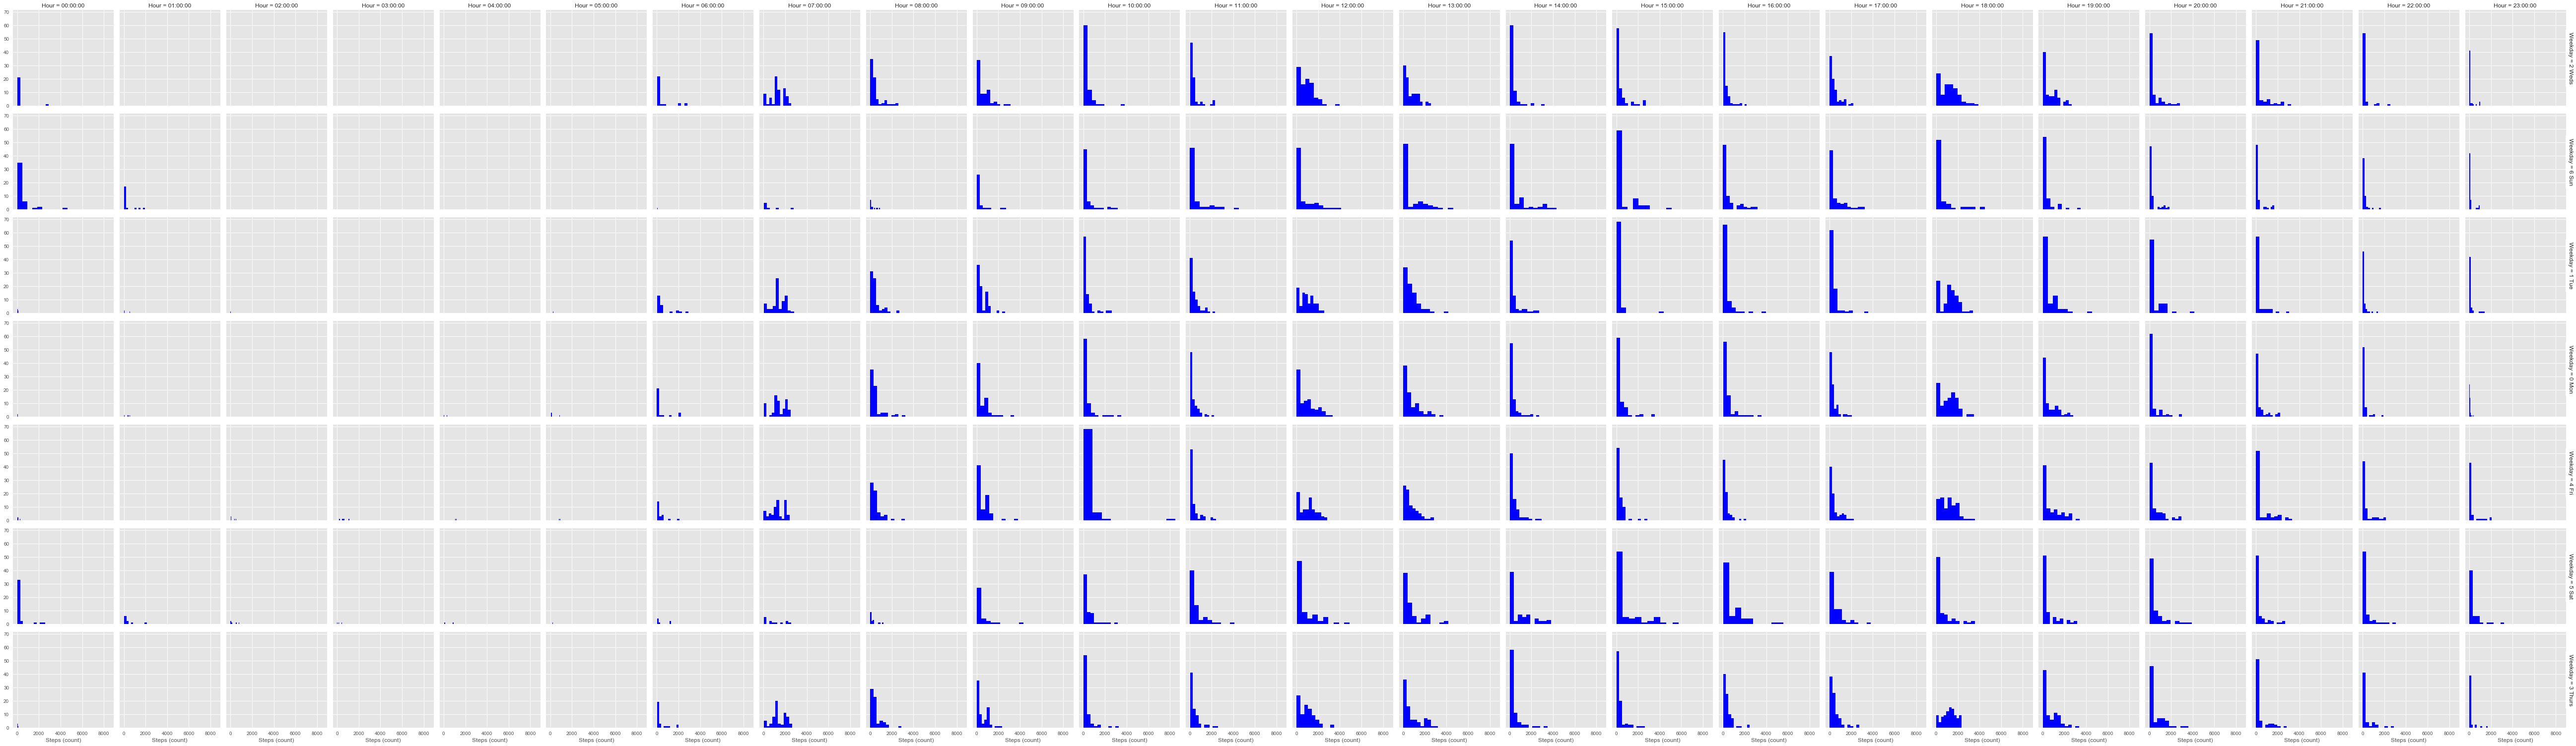

In [33]:
g = sns.FacetGrid(steps_intraday, row="Weekday", col="Hour", size=3, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=10, color="blue")

In [34]:
#Average steps per hour per day
steps_avg = pd.pivot_table(steps_intraday, index=["Hour"], columns = ['Weekday'], aggfunc=np.mean)
steps_avg

Steps (count)                                                      \
Weekday          0 Mon        1 Tue       2 Weds      3 Thurs        4 Fri   
Hour                                                                         
00:00:00     32.477306    67.272628   189.397825    33.780343    56.618200   
01:00:00    335.093653   220.666667    30.295209    44.166541    40.000000   
02:00:00   1460.963208    20.000000          NaN     8.213791   206.773171   
03:00:00     14.665918          NaN    21.666667     7.298034   609.563163   
04:00:00    156.897110          NaN     8.000000          NaN  1091.585891   
05:00:00    294.921228   142.778036    71.988919    78.000000   745.041274   
06:00:00    352.355612   582.044477   462.502213   321.963859   305.324192   
07:00:00   1375.599543  1352.743669  1281.788971  1394.825167  1280.576906   
08:00:00    510.022428   511.350872   484.706195   505.438211   523.261378   
09:00:00    483.327107   480.986945   604.588854   507.468362   579.171337   
10:00:00    332.559517   356.466646   315.166642   335.679116   419.138119   
11:00:00    335.335760   411.332258   359.573884   403.018374   328.693150   
12:00:00    928.286710   977.550636   909.153465   923.707230  1058.416891   
13:00:00    755.798471   743.161569   683.501016   793.717502   689.726776   
14:00:00    332.191856   450.909183   290.980887   377.695081   405.463122   
15:00:00    402.536023   244.601183   404.886844   332.405533   304.136470   
16:00:00    420.519003   335.461902   288.265462   393.667584   266.812458   
17:00:00    341.015402   348.353040   443.378866   483.794492   441.166498   
18:00:00   1134.672093  1197.817770  1176.897046  1221.062816  1119.677068   
19:00:00    596.693466   560.915781   661.738013   683.742991   768.113854   
20:00:00    328.632518   441.482608   434.403317   573.034772   551.094315   
21:00:00    377.648990   288.810106   455.675884   375.826058   527.674256   
22:00:00    168.195493   140.061390   191.564710   328.285157   345.202454   
23:00:00     62.677011   151.080483   129.382561   144.025863   256.826185   

                                  
Weekday        5 Sat       6 Sun  
Hour                              
00:00:00  242.597418  397.917222  
01:00:00  397.846888  255.022672  
02:00:00  303.602423  528.000000  
03:00:00  210.119104   42.000000  
04:00:00  498.500000   31.000000  
05:00:00  366.000000   46.000000  
06:00:00  421.576718   95.666667  
07:00:00  955.010196  625.695129  
08:00:00  278.223731  253.361177  
09:00:00  459.876929  317.712015  
10:00:00  447.403704  393.603955  
11:00:00  584.986855  594.899386  
12:00:00  755.479641  690.929041  
13:00:00  787.327802  730.166793  
14:00:00  907.546522  721.050962  
15:00:00  847.673090  586.091503  
16:00:00  760.934537  546.466429  
17:00:00  559.408339  600.567489  
18:00:00  555.142850  606.004858  
19:00:00  537.948414  325.965003  
20:00:00  566.600039  308.370753  
21:00:00  376.304287  260.003119  
22:00:00  318.689548  166.419615  
23:00:00  355.508777  145.422070

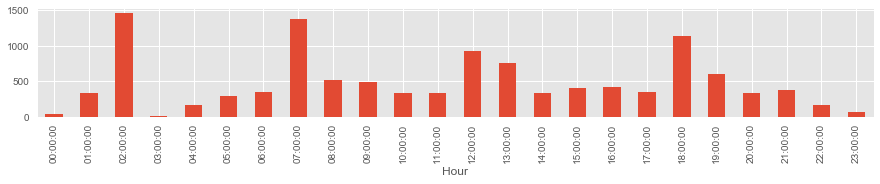

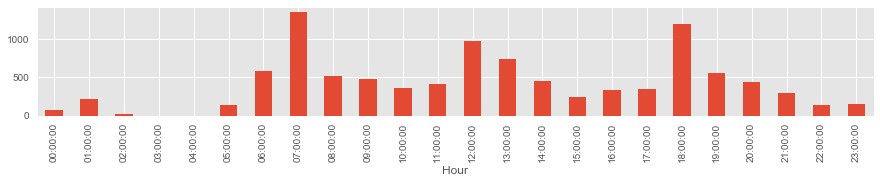

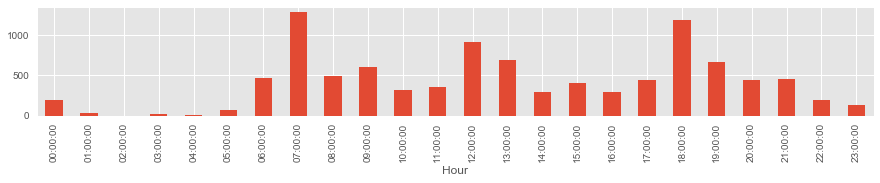

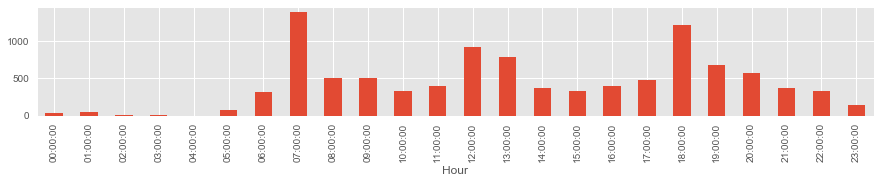

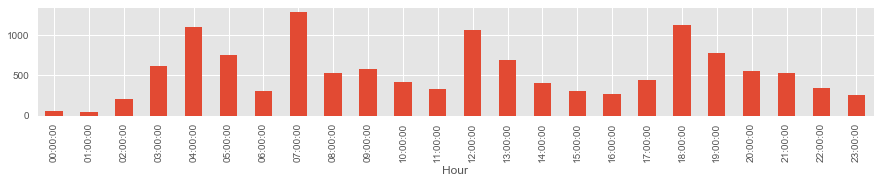

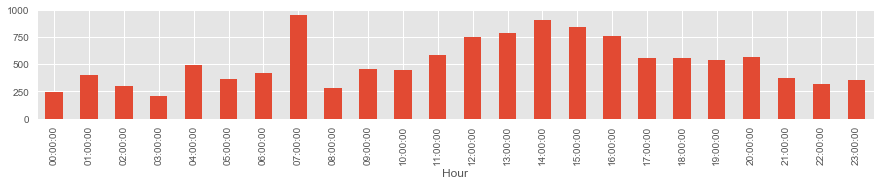

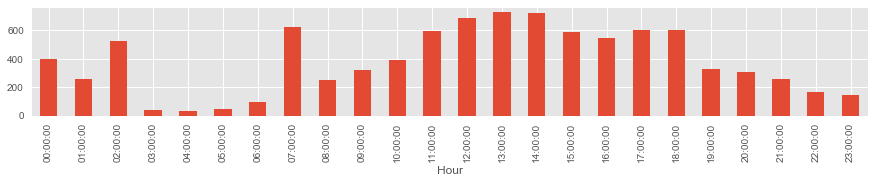

In [35]:
a = steps_avg.transpose()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["0 Mon"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["1 Tue"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["2 Weds"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["3 Thurs"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["4 Fri"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["5 Sat"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["6 Sun"].plot.bar()

In [36]:
#Total steps done per hour since 25 Sept 2015
steps_sum = pd.pivot_table(steps_intraday, index=["Hour"], columns = ['Weekday'], aggfunc=np.sum)
steps1 = steps_sum.round(2)
steps1

Steps (count)                                                       \
Weekday          0 Mon      1 Tue     2 Weds    3 Thurs     4 Fri     5 Sat   
Hour                                                                          
00:00:00        682.02    1278.18    4166.75     844.51    792.65   9218.70   
01:00:00       1005.28     662.00     181.77     176.67     80.00   3978.47   
02:00:00       1460.96      60.00        NaN      24.64   1033.87   1518.01   
03:00:00         29.33        NaN      65.00      14.60   2438.25    630.36   
04:00:00        313.79        NaN      16.00        NaN   3274.76    997.00   
05:00:00       1179.68     428.33     143.98     234.00   2235.12    732.00   
06:00:00       9513.60   13969.07   12950.06    8693.02   7022.46   2951.04   
07:00:00      93540.77   97397.54   93570.59   89268.81  85798.65  12415.13   
08:00:00      35701.57   38351.32   35383.55   33864.36  34011.99   4729.80   
09:00:00      33349.57   39440.93   43530.40   37552.66  43437.85  16555.57   
10:00:00      25274.52   30656.13   24898.16   24168.90  31854.50  26844.22   
11:00:00      27497.53   33729.25   29125.48   29420.34  26624.15  39779.11   
12:00:00      87258.95   88957.11   86369.58   78515.11  89965.44  57416.45   
13:00:00      64998.67   63911.89   63565.59   66672.27  60695.96  59049.59   
14:00:00      26907.54   37876.37   22987.49   30215.61  33653.44  64435.80   
15:00:00      33410.49   17855.89   35630.04   29584.09  25547.46  66118.50   
16:00:00      34903.08   27843.34   24502.56   33855.41  21078.18  56309.16   
17:00:00      32396.46   30655.07   38573.96   42573.92  37499.15  39158.58   
18:00:00     114601.88  113792.69  109451.43  117222.03  99651.26  43301.14   
19:00:00      50122.25   47677.84   58232.95   58118.15  63753.45  41422.03   
20:00:00      26290.60   32228.23   34752.27   41831.54  41883.17  42495.00   
21:00:00      26813.08   20505.52   31441.64   25556.17  38520.22  26717.60   
22:00:00      10764.51    8403.68   11685.45   17727.40  22438.16  22626.96   
23:00:00       2820.47    7856.19    6469.13    6481.16  13868.61  19908.49   

                    
Weekday      6 Sun  
Hour                
00:00:00  17906.27  
01:00:00   5355.48  
02:00:00    528.00  
03:00:00    126.00  
04:00:00     31.00  
05:00:00     46.00  
06:00:00    287.00  
07:00:00   5005.56  
08:00:00   3800.42  
09:00:00  10802.21  
10:00:00  24009.84  
11:00:00  38073.56  
12:00:00  49746.89  
13:00:00  52572.01  
14:00:00  53357.77  
15:00:00  44542.95  
16:00:00  42077.92  
17:00:00  44441.99  
18:00:00  43026.34  
19:00:00  22817.55  
20:00:00  20969.21  
21:00:00  16900.20  
22:00:00   8820.24  
23:00:00   7998.21

In [37]:
#Average Heart Rate per hour since 11 Mar 2016
hr_avg = pd.pivot_table(hr_intraday2, index=["Hour"], columns = ['Weekday'], aggfunc={np.median,np.mean})
hr_avg = hr_avg.round(2)
hr_avg

Heart Rate (count/min)                                          \
                           mean                                           
Weekday                   0 Mon   1 Tue  2 Weds 3 Thurs   4 Fri   5 Sat   
Hour                                                                      
00:00:00                  84.89   82.64   81.31   82.46   83.03   86.42   
01:00:00                  74.89   64.83   68.80   71.80   72.29   82.15   
02:00:00                  68.00   64.00   69.00   63.60   82.33   74.78   
03:00:00                  63.38   59.20   64.56   63.86   74.14   70.38   
04:00:00                  64.00   60.50   63.00   62.00   72.14   68.38   
05:00:00                  72.33   68.40   74.00   64.12   74.83   72.88   
06:00:00                  91.44   97.75   80.17   76.25   91.43   75.88   
07:00:00                 107.06  106.80  106.27  105.81  106.62   82.00   
08:00:00                  97.13   97.40   95.75   94.20   98.62   80.91   
09:00:00                  93.97   96.75   92.78   93.06   97.67   90.40   
10:00:00                  92.71   93.52   91.52   91.71   93.26   95.84   
11:00:00                  93.39   92.89   88.15   91.32   92.51   97.81   
12:00:00                 100.32  101.50   97.76   96.57   97.47   97.27   
13:00:00                 102.79  103.44  103.39  102.97  101.46  103.51   
14:00:00                 101.95  101.82  100.61  101.67  101.83  102.56   
15:00:00                 100.75   96.93   96.94   99.42   99.60  102.22   
16:00:00                  98.31   98.71   97.26   95.77   98.61  103.39   
17:00:00                  95.55   95.26   95.84   96.93   98.07   99.46   
18:00:00                 103.40  100.89   99.42  102.56  100.34   98.20   
19:00:00                  99.95   97.72   98.25   99.26  101.74  100.70   
20:00:00                  98.71   96.33   97.16  103.88   96.27   99.54   
21:00:00                  99.04   95.99   94.27   96.89   98.18   98.35   
22:00:00                  95.47   90.54   95.86   91.10   96.73   95.38   
23:00:00                  86.76   86.06   86.31   88.75   90.86   94.43   

                                                                    
                 median                                             
Weekday    6 Sun  0 Mon  1 Tue 2 Weds 3 Thurs  4 Fri  5 Sat  6 Sun  
Hour                                                                
00:00:00   90.25   83.5   80.0   78.0    82.0   79.5   80.0   88.0  
01:00:00   84.33   78.0   63.5   64.5    71.5   72.0   73.0   81.5  
02:00:00   68.43   65.0   64.5   61.0    62.5   79.5   65.0   63.0  
03:00:00   67.88   60.0   58.0   61.0    60.0   69.0   64.0   68.0  
04:00:00   69.00   61.0   61.0   63.5    63.0   67.0   63.0   62.0  
05:00:00   68.75   64.5   65.0   63.0    62.5   74.5   66.5   61.0  
06:00:00   71.67   94.0   99.5   73.5    72.0   83.0   66.5   63.0  
07:00:00   85.00  106.0  102.5  103.0   100.0  102.0   79.0   82.0  
08:00:00   82.91   98.0   97.0   94.0    93.0   98.0   81.0   83.0  
09:00:00   86.08   90.5   95.5   92.0    93.0   97.0   90.0   88.0  
10:00:00   89.63   90.0   90.0   89.0    90.0   91.5   97.0   89.0  
11:00:00   95.40   88.0   90.0   88.0    88.0   90.0   95.0   91.0  
12:00:00   97.98   96.0   97.0   97.0    93.5   95.0   91.0   92.0  
13:00:00   99.15   99.5  102.0  102.0   100.0  101.0   98.0   97.0  
14:00:00   99.28  100.5  101.0   99.0    98.0   99.5   99.0  100.0  
15:00:00  102.39   99.0   96.0   94.0    96.0   95.0   99.5  100.0  
16:00:00  100.17   97.0   95.0   92.5    92.5   94.0  102.5  100.0  
17:00:00  100.16   93.0   90.0   90.0    94.0   92.0   96.0   98.0  
18:00:00   99.51   94.0   99.0   96.0    99.0   99.0   96.0   92.0  
19:00:00   96.56   94.0   94.0   95.0    95.0   98.0   98.0   94.0  
20:00:00   94.86   98.0   94.5   94.0    99.0   94.5   96.0   94.0  
21:00:00   93.81   97.0   91.0   90.5    94.0   96.0   96.0   90.0  
22:00:00   92.89   90.0   90.0   94.0    89.0   95.5   93.0   90.0  
23:00:00   89.09   86.0   84.0   82.0    87.5

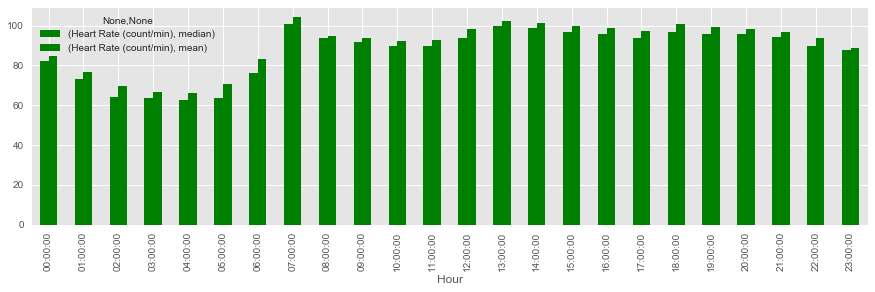

In [38]:
#Average Heart Rate per Hour Chart
a1 = hr_intraday2.groupby("Hour").agg({np.mean,np.median})
mean = hr_intraday2.groupby("Hour").agg(np.mean)
#plt.fig(figsize=(15,2))
a1.plot.bar(color='g',figsize=(15,4))

In [40]:
#I'm doing this on Windows, thus the below, if imported the site-packages properly in your PYTHONPATH,
#the below is not needed
import sys
import calmap
%pylab inline

all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

Populating the interactive namespace from numpy and matplotlib


(<matplotlib.figure.Figure at 0x20cb4a48278>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB4A28320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB4ABC470>], dtype=object))

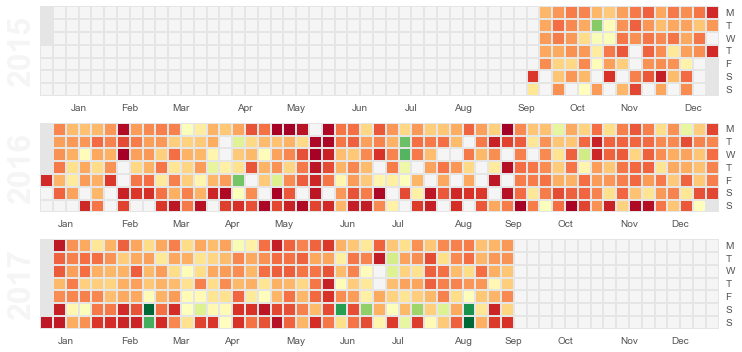

In [41]:
calendar_steps = data_for_steps['Steps (count)']
calmap.calendarplot(calendar_steps, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))

(<matplotlib.figure.Figure at 0x20c972e1198>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB4C14CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB4DD6668>], dtype=object))

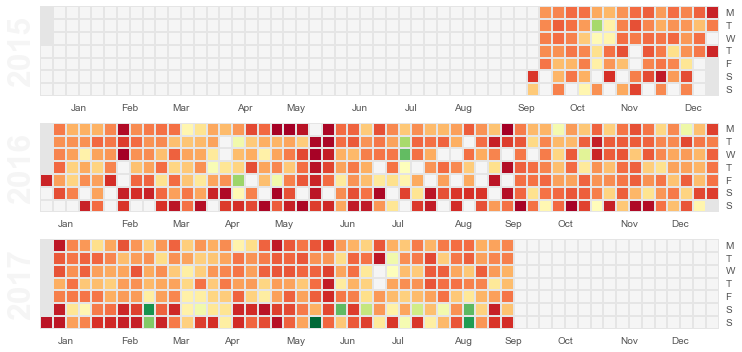

In [42]:
calendar_km = data_for_steps['Distance (km)']
calmap.calendarplot(calendar_km, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))

(<matplotlib.figure.Figure at 0x20cb4f46a58>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB4F2FE80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB4FAEAC8>], dtype=object))

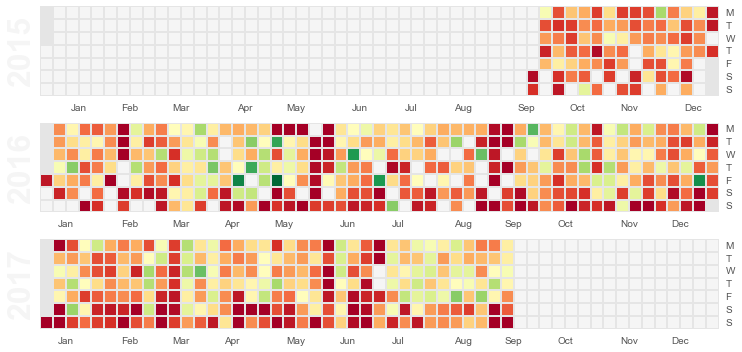

In [43]:
calendar_stairs = data_for_steps['Flights Climbed (count)']
calmap.calendarplot(calendar_stairs, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))

(<matplotlib.figure.Figure at 0x20c9d1e4978>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB507F5F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB5294AC8>], dtype=object))

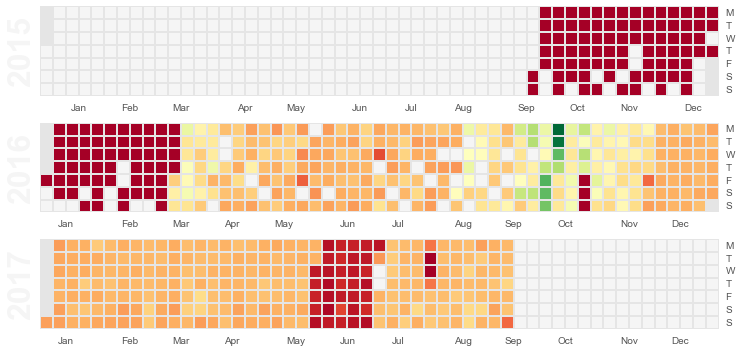

In [44]:
calendar_cals = data_for_steps['Total Calories (kcal)']
calmap.calendarplot(calendar_cals, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))

(<matplotlib.figure.Figure at 0x20cb556fa90>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB5352320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB55D5C50>], dtype=object))

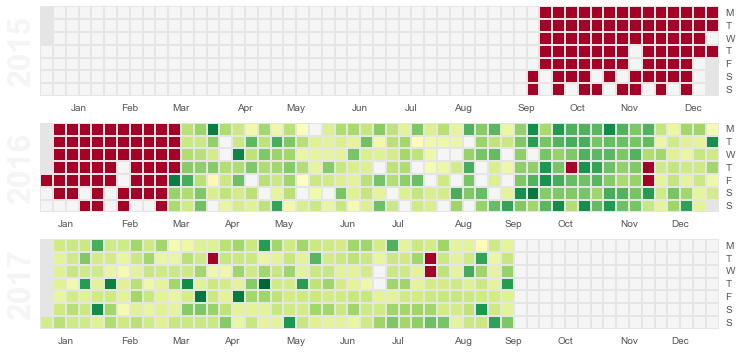

In [45]:
calendar_hr = data_for_steps['Heart Rate (count/min)']
calmap.calendarplot(calendar_hr, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))

(<matplotlib.figure.Figure at 0x20cb5881550>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CB58685F8>], dtype=object))

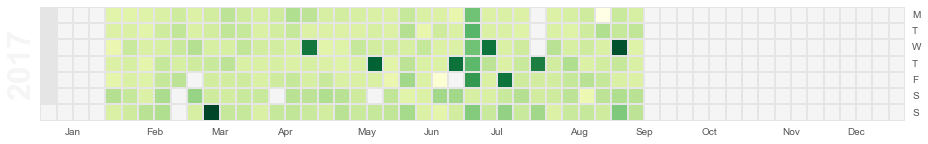

In [46]:
sleep_heat = raw_sleep_data2
sleep_heat = sleep_heat.drop("Weekday",axis=1)
sleep_heat.index = pd.to_datetime(sleep_heat.index)
sleep_heat = sleep_heat['Hours in bed']
calmap.calendarplot(sleep_heat, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='YlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))

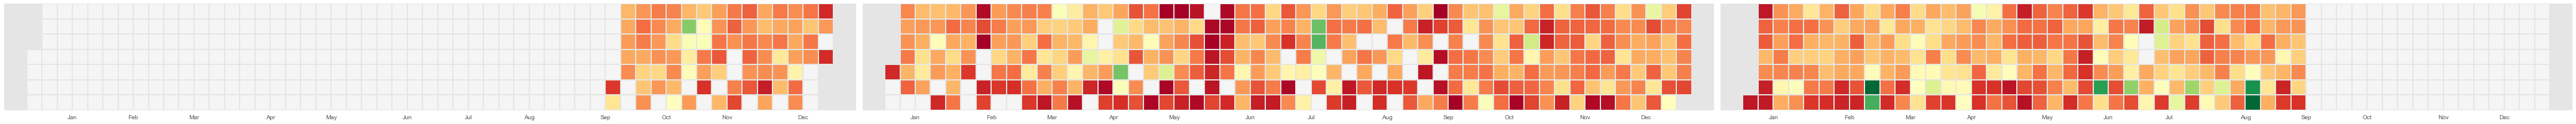

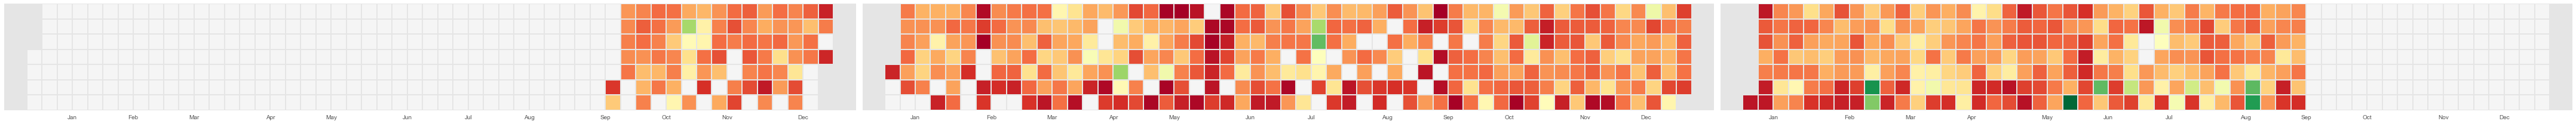

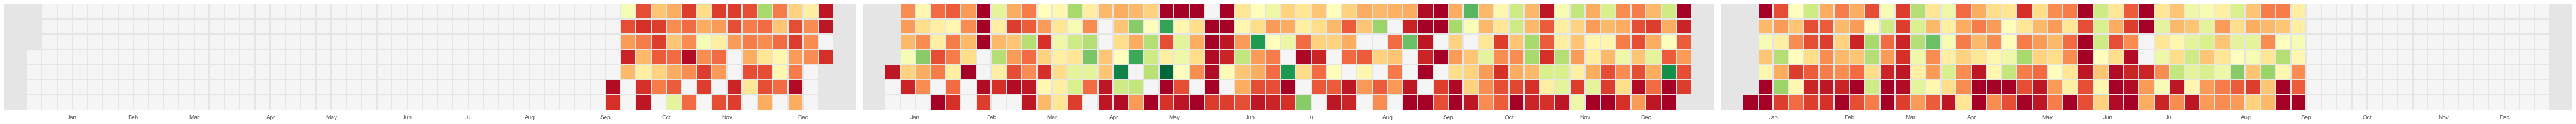

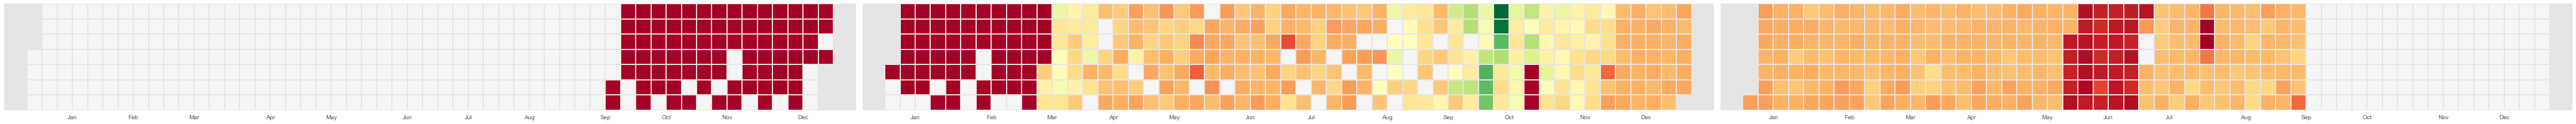

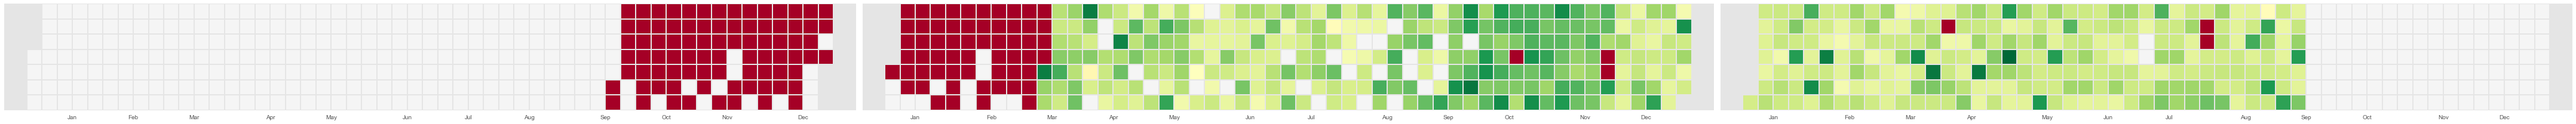

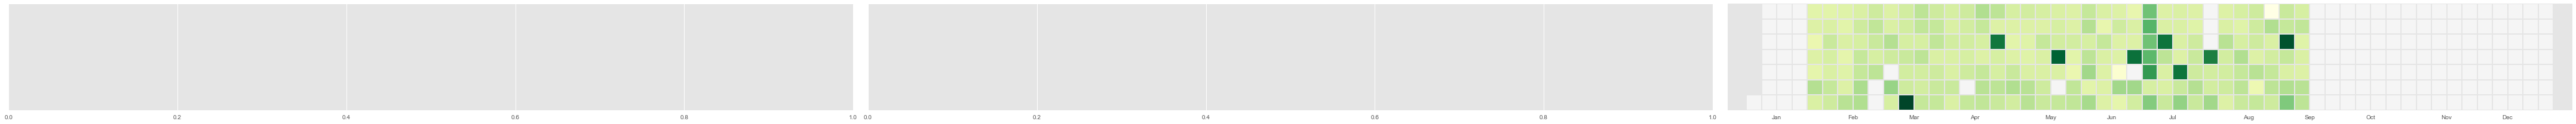

In [47]:
# Horizontal Calendar HeatMaps
calendar_steps = data_for_steps['Steps (count)']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
f.set_figheight(3)
f.set_figwidth(60)
cal_2015 = calmap.yearplot(calendar_steps, year=2015, cmap='RdYlGn', dayticks=False, ax=ax1)
cal_2016 = calmap.yearplot(calendar_steps, year=2016, cmap='RdYlGn', dayticks=False, ax=ax2)
cal_2017 = calmap.yearplot(calendar_steps, year=2017, cmap='RdYlGn', dayticks=False, ax=ax3)
f.subplots_adjust(hspace=0)
f.set_tight_layout(True)

calendar_km = data_for_steps['Distance (km)']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
f.set_figheight(3)
f.set_figwidth(60)
cal_2015 = calmap.yearplot(calendar_km, year=2015, cmap='RdYlGn', dayticks=False, ax=ax1)
cal_2016 = calmap.yearplot(calendar_km, year=2016, cmap='RdYlGn', dayticks=False, ax=ax2)
cal_2017 = calmap.yearplot(calendar_km, year=2017, cmap='RdYlGn', dayticks=False, ax=ax3)
f.subplots_adjust(hspace=0)
f.set_tight_layout(True)

calendar_stairs = data_for_steps['Flights Climbed (count)']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
f.set_figheight(3)
f.set_figwidth(60)
cal_2015 = calmap.yearplot(calendar_stairs, year=2015, cmap='RdYlGn', dayticks=False, ax=ax1)
cal_2016 = calmap.yearplot(calendar_stairs, year=2016, cmap='RdYlGn', dayticks=False, ax=ax2)
cal_2017 = calmap.yearplot(calendar_stairs, year=2017, cmap='RdYlGn', dayticks=False, ax=ax3)
f.subplots_adjust(hspace=0)
f.set_tight_layout(True)

calendar_cals = data_for_steps['Total Calories (kcal)']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
f.set_figheight(3)
f.set_figwidth(60)
cal_2015 = calmap.yearplot(calendar_cals, year=2015, cmap='RdYlGn', dayticks=False, ax=ax1)
cal_2016 = calmap.yearplot(calendar_cals, year=2016, cmap='RdYlGn', dayticks=False, ax=ax2)
cal_2017 = calmap.yearplot(calendar_cals, year=2017, cmap='RdYlGn', dayticks=False, ax=ax3)
f.subplots_adjust(hspace=0)
f.set_tight_layout(True)

calendar_hr = data_for_steps['Heart Rate (count/min)']
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
f.set_figheight(3)
f.set_figwidth(60)
cal_2015 = calmap.yearplot(calendar_hr, year=2015, cmap='RdYlGn', dayticks=False, ax=ax1)
cal_2016 = calmap.yearplot(calendar_hr, year=2016, cmap='RdYlGn', dayticks=False, ax=ax2)
cal_2017 = calmap.yearplot(calendar_hr, year=2017, cmap='RdYlGn', dayticks=False, ax=ax3)
f.subplots_adjust(hspace=0)
f.set_tight_layout(True)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
f.set_figheight(3)
f.set_figwidth(60)
cal_2017 = calmap.yearplot(sleep_heat, year=2017, cmap='YlGn', dayticks=False, ax=ax3)
f.subplots_adjust(hspace=0)
f.set_tight_layout(True)

In [48]:
raw_exercise = pd.read_csv("HKQuantityTypeIdentifierAppleExerciseTime.csv",delimiter=';')
cols_exercise = [0,1,2,3,4,5,6]
raw_exercise.drop(raw_exercise.columns[cols_exercise],axis=1,inplace=True)
raw_exercise['date'] = pd.to_datetime(raw_exercise['endDate']).dt.date
raw_exercise.drop('endDate',axis=1)
raw_exercise = raw_exercise.groupby('date').agg(sum)

raw_stand_hours = pd.read_csv("HKCategoryTypeIdentifierAppleStandHour.csv",delimiter=';')
raw_stand_hours = raw_stand_hours.replace(to_replace="HKCategoryValueAppleStandHourIdle", value=0, inplace=False, limit=None, regex=False, method='pad')
raw_stand_hours = raw_stand_hours.replace(to_replace="HKCategoryValueAppleStandHourStood", value=1, inplace=False, limit=None, regex=False, method='pad')
cols_stand = [0,1,2,3,4,5]
raw_stand_hours.drop(raw_stand_hours.columns[cols_stand],axis=1,inplace=True)
raw_stand_hours['date'] = pd.to_datetime(raw_stand_hours['endDate']).dt.date
raw_stand_hours.drop('endDate',axis=1)
raw_stand_hours = raw_stand_hours.groupby('date').agg(sum)
#add a column with the date and sum per day for both dataframes and drop the time column

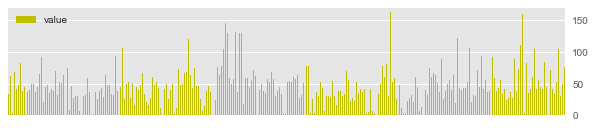

In [49]:
#Exercise Minutes TimeSeries
ax_exercise = raw_exercise.plot.bar(color='y',figsize=(10,2))
ax_exercise.axes.get_xaxis().set_visible(False)
ax_exercise.yaxis.tick_right()

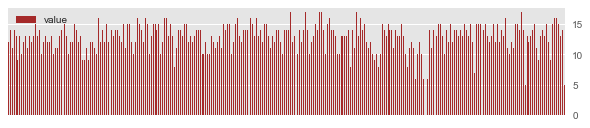

In [50]:
#Stand Hours TimeSeries
ax_stand = raw_stand_hours.plot.bar(color='brown',figsize=(10,2))
ax_stand.axes.get_xaxis().set_visible(False)
ax_stand.yaxis.tick_right()

In [51]:
#TODO
#Make use of the new Workouts Data set
#Make use of the Blood Pressure data
#Refactor the code for table cleaning and charts